In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
# import scipy as sp
# from matplotlib.pyplot import imread

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2

# proportion of pixels to alter
prop = 0.1
varSigma = 0.1
im = imageio.imread('/extra/MLcw2/mlcw2/pug2.png')
im = im/255

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')

im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

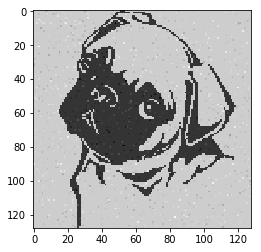

In [2]:
#gaussian noise image

fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.imshow(im2,cmap='gray')

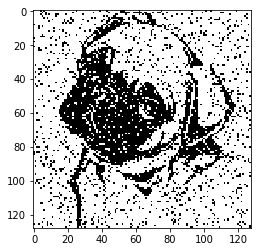

In [3]:
#salt and pepper image

fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.imshow(im3,cmap='gray')

In [4]:

def neighbours(i,j,M,N,size=8):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        if (i==0 and j==0):
            n=[(0,1), (1,0), (1,1)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1), (1, N-2)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0), (M-2, 1)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1), (M-2, M-2)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j), (1, j-1), (1, j+1)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j), (M-2, j-1), (M-2, j+1)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1), (i-1, 1), (i+1, 1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2), (i-1, N-2), (i+1, N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1), (i+1, j+1), (i+1, j-1), (i-1, j-1), (i-1, j+1)]
        return n
    return -1

def neighborvalues(i, j, M, N, x, size = 4):
    return list(map(lambda el: x[el[0], el[1]], neighbours(i, j, M, N, size)))
    

def energyfunction(x, neighbors, y, beta, ita):
    return np.exp(beta * x * np.sum(neighbors) + ita*x*y)


#we use this one in our situation
# def energyfunction2(x, neighbors, y, beta, ita):
#     y_scaled = y*2 - 1
#     return np.exp(beta * x * np.sum(neighbors) + 1 * (- np.linalg.norm(x-y_scaled)))

def energyfunction2(x, neighbors, y, beta, ita):
    y_scaled = y*2 - 1
    return np.exp(beta * x * np.sum(neighbors) + ita * (- np.linalg.norm(x-y_scaled)))

    
M, N = im2.shape
     

beta = 1
ita = 2

# ICM

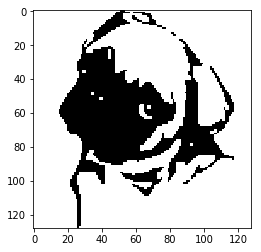

In [5]:
#first for gaussian noise
x = np.random.rand(im2.shape[0], im2.shape[1])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

# print(x)
changed = True
T = 100
count = 0

while changed:
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im2[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(- 1, neighbors, y, beta, ita)
                if energy1 > energy2:
                    if x[i, j] == -1:
                        changed = True
                    x[i,j] = 1
                else:
                    if x[i, j] == 1:
                        changed = True
                    x[i,j] = -1
            

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')
        

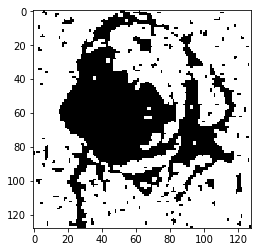

In [6]:
#now we try ICM with salt and pepper

x = np.random.rand(im2.shape[0], im2.shape[1])
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

# print(x)
changed = True
T = 100
count = 0

while changed:
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im3[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(- 1, neighbors, y, beta, ita)
                if energy1 > energy2:
                    if x[i, j] == -1:
                        changed = True
                    x[i,j] = 1
                else:
                    if x[i, j] == 1:
                        changed = True
                    x[i,j] = -1
            

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

# GIBBS

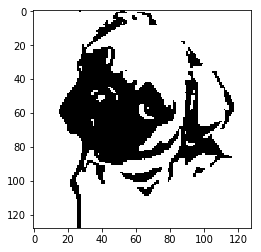

In [7]:
#Gibbs for gaussian noise
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

# print(x)                    
changed = True
T = 7
count = 0

for t in range(T):
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
#                 print(x[i,j])
                neighbors = neighborvalues(i, j, M, N, x)
                y = im2[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(-1, neighbors, y, beta, ita)
                posterior = energy1/(energy1 + energy2)
#                 print(posterior)
                z = np.random.rand()
                if z < posterior:
                    x[i,j] = 1
                else:
                    x[i,j] = -1
            
        

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

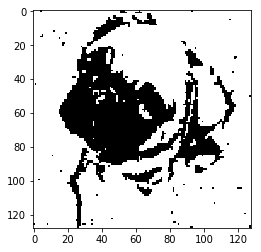

In [8]:
#Gibbs for salt and pepper noise
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

# print(x)                    
changed = True
T = 7
count = 0

for t in range(T):
        changed = False
        count = count + 1

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                neighbors = neighborvalues(i, j, M, N, x)
                y = im3[i,j]
                energy1 = energyfunction2(1, neighbors, y, beta, ita);
                energy2 = energyfunction2(-1, neighbors, y, beta, ita)
                posterior = energy1/(energy1 + energy2)
#                 print(posterior)
                z = np.random.rand()
                if z < posterior:
                    x[i,j] = 1
                else:
                    x[i,j] = -1
            
        

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

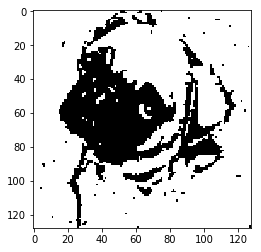

In [9]:
#Now we will try to pick random indices instead 
#Gibbs for salt and pepper noise
np.random.seed(42)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

changed = True
T = 15
count = 0

for t in range(T):
    changed = False
    count = count + 1
    #idk look up about 16000 numbers maybe for each timestep
    for k in range(x.shape[0]*x.shape[1]):
#         print(k)
        i = np.random.randint(0,x.shape[0])
        j = np.random.randint(0,x.shape[1])
#         print(i, j)
        neighbors = neighborvalues(i, j, M, N, x)
        y = im3[i,j]
        energy1 = energyfunction2(1, neighbors, y, beta, ita);
        energy2 = energyfunction2(-1, neighbors, y, beta, ita)
        posterior = energy1/(energy1 + energy2)
#         print(posterior)
        z = np.random.rand()
        if z < posterior:
            x[i,j] = 1
        else:
            x[i,j] = -1

        

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(x,cmap='gray')

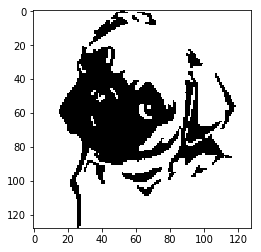

In [10]:
#Variational Bayes
from math import tanh

y = im2

mu = np.zeros(shape=x.shape) + 1

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

def L(value, y, ita = 1):
    y_scaled = y*2 - 1
    return - ita * np.linalg.norm(value - y_scaled)

def sigmoid(x):
    return 1 / (1 + np.exp(- x))

def varBayes(x, T = 10):
    q = np.zeros(shape=x.shape)
    for t in range(T):
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                m = 0.5*np.sum(neighborvalues(i, j, x.shape[0], x.shape[1], mu))
                alpha = m + 0.5 * (L(1, y[i, j], 1.0) - L(-1, y[i, j], 1.0))
                mu[i, j] = tanh(alpha)
                if (t == T - 1):
                    q[i, j] = sigmoid(2 * alpha)
                    #if q[i, j] < 0.5:
                     #   print(q[i, j])
    return q

posterior = varBayes(x, 10)

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if posterior[i, j] > 0.5:
            x[i, j] = 1
        else:
            x[i, j] = -1
        
ax.imshow(x, cmap='gray')

FileNotFoundError: No such file: '/extra/MLcw2/mlcw2/manOnMoonMasked.jpg'

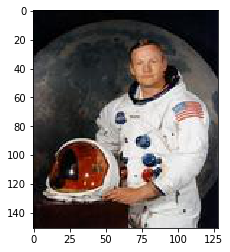

In [21]:
#Image Segmentation

im4 = imageio.imread('/extra/MLcw2/mlcw2/manOnMoon.jpg')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im4)

im4masked = imageio.imread('/extra/MLcw2/mlcw2/manOnMoonMasked.jpg')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im4masked)


0.46161414343735935
0.9971173367491964
0.9999999822371006
0.0021207845448329757
0.0021207845448329757
1.3058244151333011e-08
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.0021207845448329757
0.0021207845448329757
0.9971173367491964
0.9999999822371006
0.0021207845448329757
0.9971173367491964
0.9971173367491964
0.0021207845448329757
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
1.3058244151333011e-08
0.0021207845448329757
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.9999999822371006
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.0021207845448329757
0.0021207845448329757
0.9971173367491964
0.9971173367491964
0.0021207845448329757
0.0021207845448329757
1.3058244151333011e-08
0.0

5.268043999463822e-06
3.236815153518097e-11
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.999992833986192
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.46161414343735935
0.9999999999559702
0.999992833986192
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
0.999992833986192
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
0.46161414343735935
0.46161414343735935
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-

0.46161414343735935
0.46161414343735935
0.46161414343735935
0.9971173367491964
0.0021207845448329757
0.46161414343735935
0.999992833986192
0.999992833986192
0.9999999999559702
0.999992833986192
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.999992833986192
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.999992833986192
0.46161414343735935
0.9999999999559702
0.46161414343735935
0.999992833986192
0.46161414343735935
0.9999999999559702
0.999992833986192
0.46161414343735935
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.999992833986192
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.461

0.46161414343735935
0.999992833986192
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
5.545245589811447e-06
3.022015737795674e-11
3.6791669930383133e-06
4.516844964514833e-06
2.7752579982371273e-11
4.516844964514833e-06
3.6791669930383133e-06
0.9999897393026012
0.4446004005260792
0.9999897393026012
0.9999897393026012
0.9999897393026012
0.9999923246427939
0.9999923246427939
0.9999999999528407
0.374532564593085
0.4446004005260792
0.374532564593085
0.374532564593085
0.9999897393026012
0.9999999999369555
0.9999999999369555
0.374532564593085
0.374532564593085
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
0.374532564593085
0.9999897393026012
0.9999897393026012
0.9999897393026012
0.374532564593085
0.374532564593085
0.9999897393026012
0.374532564593085
0.374532564593085
0.9999999999369555
0.999991642206074
0.374532564593085
0.9999923246427939
0.374532

5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.999992833986192
0.999992833986192
0.9999999999559702
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
0.999992833986192
0.9999931922079034
0.47438142807934597
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.374532564593085
0.374532564593085
0.374532564593085
0.374532564593085
0.374532564593085
2.2605666458094283e-11
0.374532564593085
3.022015737795674e-11
0.4446004005260792
0.4446004005260792
0.4446004005260792
0.9999923246427939
0.4446004005260792
4.918451219566073e-06
5.545245589811447e-06
4.918451219566073e-06
0.374532564593085
0.374532564593085
0.9999923246427939
5.545245589811447e-06
4.918451219566073e-06
0.9999923246427939
0.9999923246427939
0.9999923246427939
0.4446004005260792
0.9999999999528407
0.9999999999528407
0.9999923246427939
0.47438142807934597
3.407135538803062e-11
3.022015737795674e-11
4.918451219566073e-06
0.374532564593085
0.

0.374532564593085
0.4446004005260792
3.407135538803062e-11
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
0.9999923246427939
0.9999931922079034
0.9999931922079034
0.4446004005260792
3.022015737795674e-11
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
5.545245589811447e-06
4.918451219566073e-06
4.918451219566073e-06
0.4446004005260792
0.4446004005260792
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999923246427939
0.9999923246427939
0.9999923246427939
0.9999897393026012
0.42367812009254757
0.49565417289059105
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999999999369555
0.999992833986192
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.46161414343735935
0.999992833986192
0.999992833986192
5.268043999463822e-06
0.46161414343735935
3.236815153518097e-11
0.4

0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
4.918451219566073e-06
3.6791669930383133e-06
0.374532564593085
0.374532564593085
0.374532564593085
2.7752579982371273e-11
3.6791669930383133e-06
3.6791669930383133e-06
4.516844964514833e-06
4.516844964514833e-06
0.4446004005260792
4.918451219566073e-06
4.516844964514833e-06
0.42367812009254757
0.999991642206074
0.9999999999615867
0.47438142807934597
0.47438142807934597
0.9999999999581711
0.9999999999615867
0.49565417289059105
0.9999897393026012
4.918451219566073e-06
4.918451219566073e-06
0.47438142807934597
0.47438142807934597
0.47438142807934597
0.47438142807934597
4.918451219566073e-06
4.516844964514833e-06
0.9999897393026012
0.9999923246427939
0.9999923246427939
0.47438142807934597
5.545245589811447e-06
0.4446004005260792
4.918451219566073e-06
3.022015737795674e-11
4.918451219566073e-06
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
4.91845

0.49565417289059105
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.5084737648565952
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.9999937480835283
0.49565417289059105
0.49565417289059105
0.49565417289059105
0.999991642206074
0.374532564593085
4.918451219566073e-06
0.4446004005260792
0.42367812009254757
0.9999897393026012
0.9999931922079034
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.47438142807934597
6.038289481789429e-06
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.42367812009254757
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.999992833986192
0.999999

0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.0021207845448329757
0.002232130590087201
0.42367812009254757
5.545245589811447e-06
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.47438142807934597
0.47438142807934597
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.47438142807934597
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
0.42367812009254757
3.6791669930383133e-06
4.918451219566073e-06
3.6791669930383133e-06
0.999991642206074
0.9999999999486475
0.374532564593085
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.47438142807934597
5.545245589811447e-06
0.47438142807934597
4.918451219566073e-06
4.918451219566073e-06
5.545245589811447e-06
5.545245589811447e-06
3.022015737795674e-11
4.9184512

4.039951282299506e-11
0.5169426634623426
6.3560207100023604e-06
0.5084737648565952
0.9999999999647231
0.9999940606107188
0.9999999999647231
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.5169426634623426
0.9999999999647231
0.9999999999647231
0.9999940606107188
0.5169426634623426
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999935325225932
5.545245589811447e-06
3.7100756850715804e-11
0.47438142807934597
0.42367812009254757
0.9999931922079034
0.9999999999581711
0.47438142807934597
0.9999999999486475
0.9999931922079034
0.47438142807934597
0.9999931922079034
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.47438142807934597
5.837033290900522e-06
5.837033290900522e-06
3.58641813918735e-11
0.48718229610828767
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.48718229610828767
5.545245589811447e-06
4.91845121956

3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.9999935325225932
0.9999935325225932
0.9999935325225932
0.9999999999602622
0.9999935325225932
0.48718229610828767
3.58641813918735e-11
5.837033290900522e-06
5.837033290900522e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.999992833986192
0.9999999999559702
0.46161414343735935
0.999992833986192
5.268043999463822e-06
1.3058244151333011e-08
0.9972610444319845
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
0.48718229610828767
5.545245589811447e-06
3.407135538803062e-11
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
0.47438142807934597
5.545245589811447e-06
0.47438142807934597
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.99999

3.6791669930383133e-06
0.374532564593085
3.6791669930383133e-06
4.918451219566073e-06
2.2605666458094283e-11
4.516844964514833e-06
0.374532564593085
0.9999897393026012
0.42367812009254757
0.999991642206074
0.9999999999369555
0.9999931922079034
0.9999931922079034
0.9999935325225932
0.9999942585705849
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
0.5169426634623426
0.5169426634623426
0.5169426634623426
0.5169426634623426
6.3560207100023604e-06
0.5169426634623426
0.5169426634623426
0.5084737648565952
0.9999940606107188
6.3560207100023604e-06
6.575171050042968e-06
4.039951282299506e-11
4.039951282299506e-11
6.3560207100023604e-06
0.5084737648565952
0.46161414343735935
0.999992833986192
0.999992833986192
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.9999940606107188
0.47438142807934597
0.47438142807934597
0.47438

5.545245589811447e-06
5.837033290900522e-06
3.58641813918735e-11
3.58641813918735e-11
5.545245589811447e-06
0.9999931922079034
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
0.42367812009254757
0.999991642206074
0.42367812009254757
5.545245589811447e-06
2.7752579982371273e-11
4.516844964514833e-06
4.516844964514833e-06
4.516844964514833e-06
4.516844964514833e-06
3.6791669930383133e-06
0.374532564593085
3.6791669930383133e-06
2.2605666458094283e-11
0.374532564593085
2.2605666458094283e-11
3.6791669930383133e-06
3.6791669930383133e-06
2.2605666458094283e-11
3.6791669930383133e-06
0.374532564593085
2.2605666458094283e-11
0.374532564593085
3.6791669930383133e-06
0.9999897393026012
0.374532564593085
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
4.516844964514833e-06
0.4446004005260792
0.44460

0.9999897393026012
0.9999897393026012
0.999991642206074
0.42367812009254757
0.42367812009254757
2.7752579982371273e-11
3.6791669930383133e-06
2.2605666458094283e-11
0.374532564593085
3.6791669930383133e-06
2.2605666458094283e-11
0.374532564593085
0.9999897393026012
0.9999897393026012
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
0.374532564593085
3.022015737795674e-11
0.47438142807934597
0.4446004005260792
0.4446004005260792
4.918451219566073e-06
3.6791669930383133e-06
0.42367812009254757
0.9999999999486475
0.999991642206074
0.42367812009254757
0.42367812009254757
2.7752579982371273e-11
6.038289481789429e-06
4.516844964514833e-06
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999999999559702
0.999992833986192
0.9999999999559702
0.999992833986192
0.47438142807934597
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.5084737648565952
6.575171050042968e-06
4.039951282299506e-11
0.5169426634623426
0.9999940606107188
0.9999940606107188
0.99999406

0.4446004005260792
0.49565417289059105
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
6.038289481789429e-06
0.46161414343735935
0.47438142807934597
0.9999931922079034
0.999992833986192
0.47438142807934597
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
6.3560207100023604e-06
6.575171050042968e-06
6.575171050042968e-06
0.5169426634623426
0.9999942585705849
0.5169426634623426
0.5169426634623426
6.575171050042968e-06
6.575171050042968e-06
0.5169426634623426
0.5169426634623426
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
0.48718229610828767
0.4446004005260792
0.9999897393026012
0.9999999999528407
0.9999999999581711
0.9999942585705849
6.3560207100023604e-06
7.789610852742296e-06
6.575171050042968e-06
4.6266166387264517e-11
7.529983559385196e-06
4.7861396048398055e-11
6.575171050042968e-06
0.5169426634623426
0.5084737648565952
0.9999940606107188
5.837033290900522e-06
0.5

0.9999940606107188
0.5084737648565952
0.9999931922079034
0.49565417289059105
0.49565417289059105
5.837033290900522e-06
5.545245589811447e-06
4.039951282299506e-11
0.5084737648565952
0.5084737648565952
7.789610852742296e-06
7.789610852742296e-06
7.789610852742296e-06
0.5506728940248811
0.9999951536900706
0.9999942585705849
6.575171050042968e-06
0.5590452450857901
0.5506728940248811
7.529983559385196e-06
7.789610852742296e-06
0.5254018407381961
0.5169426634623426
0.9999999999635069
0.9999999999647231
0.9999944499324845
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999935325225932
0.9999940606107188
0.48718229610828767
5.837033290900522e-06
0.48718229610828767
5.837033290900522e-06
6.3560207100023604e-06
6.3560207100023604e-06
5.837033290900522e-06
0.47438142807934597
0.9999931922079034
0.47438142807934597
0.9972610444319845
0.9999999839686229
0.9999999999602622
0.48718229610828767
0.48718229610828767
0.487182296108287

0.42367812009254757
4.516844964514833e-06
0.4446004005260792
0.42367812009254757
0.9999937480835283
0.999991642206074
0.47438142807934597
0.47438142807934597
0.47438142807934597
0.4446004005260792
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
5.837033290900522e-06
6.3560207100023604e-06
0.5084737648565952
0.5169426634623426
0.5169426634623426
0.9999942585705849
0.5169426634623426
0.5169426634623426
0.5254018407381961
0.9999942585705849
0.999999999965899
0.9999942585705849
0.5254018407381961
0.9999942585705849
6.801877461257063e-06
6.575171050042968e-06
6.801877461257063e-06
0.9999931922079034
0.999992833986192
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.5084737648565952
0.9999951536900706
0.9999951536900706
0.5590452450857901
0.9999951536900706
0.9999942585705849
0.999999999970223
0.9999949865930494
0.999999999970223
0.5169426634623426
0.9999951536900706
0.5590452

6.3560207100023604e-06
0.5169426634623426
0.5169426634623426
0.5169426634623426
0.9999942585705849
0.5084737648565952
0.5084737648565952
0.5254018407381961
4.1792463788751273e-11
6.575171050042968e-06
3.905298918448936e-11
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.48718229610828767
0.9999931922079034
0.9999999999581711
0.9966395279487341
0.9973976066397159
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.48718229610828767
0.9999935325225932
0.9999935325225932
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
0.9999931922079034
0.9999931922079034
0.9999937480835283
0.49565417289059105
2.2605666458094283e-11
0.374532564593085
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
3.6791669930383133e-06
3.6791669930383133e-06
0.9999923246427939
0.9999923246427939
4.918451219566073e-06
0.4446004005260792
0.47438142807934597
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
4.91845121956

0.47438142807934597
0.999991642206074
0.999991642206074
0.5169426634623426
0.9999942585705849
0.9999999999635069
0.9999940606107188
0.5254018407381961
6.3560207100023604e-06
0.9999940606107188
0.9999942585705849
0.5254018407381961
6.575171050042968e-06
7.789610852742296e-06
0.5169426634623426
0.4446004005260792
5.545245589811447e-06
5.545245589811447e-06
0.42367812009254757
0.47438142807934597
0.5084737648565952
0.9999951536900706
0.5590452450857901
0.5590452450857901
0.9999951536900706
0.5590452450857901
0.5590452450857901
7.529983559385196e-06
4.7861396048398055e-11
4.7861396048398055e-11
0.5590452450857901
0.9999999999691963
0.9999951536900706
0.9999949865930494
0.5254018407381961
0.5506728940248811
0.5590452450857901
0.9999951536900706
0.5506728940248811
0.5506728940248811
7.789610852742296e-06
0.9999951536900706
0.9999944499324845
0.5506728940248811
0.9999942585705849
0.9999949865930494
0.9999951536900706
0.9999999999647231
0.9999951536900706
0.9999949865930494
0.9999949865930494


0.5084737648565952
0.5084737648565952
6.575171050042968e-06
6.3560207100023604e-06
0.5084737648565952
6.3560207100023604e-06
0.9999944499324845
0.999999999965899
0.5590452450857901
0.5084737648565952
0.9999951536900706
0.9999944499324845
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
6.801877461257063e-06
7.789610852742296e-06
0.5254018407381961
0.9999942585705849
0.5084737648565952
5.837033290900522e-06
0.48718229610828767
5.837033290900522e-06
0.48718229610828767
0.00255765966755139
0.9999999831250559
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999937480835283
6.038289481789429e-06
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999999999615867
0.374532564593085
2.2605666458094283e-11
0.49565417289059105
6.038289481789429e-06
2.7752579982371273e-11
3.6791669930383133e-06
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
4.9184512195660

2.2605666458094283e-11
0.374532564593085
4.516844964514833e-06
0.42367812009254757
4.516844964514833e-06
2.2605666458094283e-11
0.374532564593085
0.9999897393026012
0.9999923246427939
0.9999923246427939
0.4446004005260792
0.9999923246427939
0.4446004005260792
0.4446004005260792
0.9999923246427939
0.9999923246427939
0.9999999999528407
0.4446004005260792
0.9999931922079034
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
0.374532564593085
0.47438142807934597
0.47438142807934597
0.9999923246427939
0.47438142807934597
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
0.9999999999635069
0.9999940606107188
0.9999942585705849
0.9999999999635069
0.9999940606107188
6.575171050042968e-06
6.3560207100023604e-06
0.5084

0.5590452450857901
0.5254018407381961
0.999999999965899
0.5254018407381961
0.5590452450857901
0.9999951536900706
0.9999951536900706
0.5590452450857901
0.5254018407381961
6.801877461257063e-06
4.1792463788751273e-11
7.789610852742296e-06
0.5590452450857901
0.5506728940248811
0.5506728940248811
7.789610852742296e-06
0.5169426634623426
0.5169426634623426
0.5254018407381961
0.9999935325225932
0.47438142807934597
5.837033290900522e-06
5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
0.002232130590087201
0.001818919049865746
0.42367812009254757
2.7752579982371273e-11
2.2605666458094283e-11
3.6791669930383133e-06
3.6791669930383133e-06
2.2605666458094283e-11
0.374532564593085
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
3.022015737795674e-11
0.4446004005260792
0.47438142807934597
0.9999923246427939
0.99999232464

5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
0.47438142807934597
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.999992833986192
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.47438142807934597
0.9999923246427939
0.999992833986192
5.837033290900522e-06
0.5169426634623426
6.3560207100023604e-06
6.575171050042968e-06
0.5084737648565952
6.3560207100023604e-06
6.575171050042968e-06
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.5169426634623426
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.5084737648565952
6.801877461257063e-06
0.9999942585705849
0.9999999999647231
0.9999940606107188
0.5169426634623426
6.575171050042968e-06
0.5590452450857901
4.7861396048398055e-11
7.529983559385196e-06
4.6266166387264517e-11
4.7861396048398055e-11
6.801877461257063e-06
6.575171050042968e-06
0.47438142807934

3.905298918448936e-11
0.5169426634623426
0.9999940606107188
0.48718229610828767
4.039951282299506e-11
0.5506728940248811
7.789610852742296e-06
4.6266166387264517e-11
0.5506728940248811
0.9999944499324845
0.9999951536900706
0.9999942585705849
0.9999944499324845
0.999999999970223
0.9999944499324845
0.9999944499324845
7.789610852742296e-06
6.801877461257063e-06
7.529983559385196e-06
0.5590452450857901
0.9999949865930494
0.9999951536900706
0.9999951536900706
0.5590452450857901
0.5254018407381961
7.789610852742296e-06
6.801877461257063e-06
4.7861396048398055e-11
0.5590452450857901
0.9999949865930494
0.5506728940248811
0.9999949865930494
0.999999999970223
0.9999944499324845
0.5254018407381961
0.5254018407381961
0.5590452450857901
0.5590452450857901
0.5506728940248811
0.5169426634623426
0.5169426634623426
0.9999942585705849
6.801877461257063e-06
4.039951282299506e-11
0.48718229610828767
4.516844964514833e-06
0.9999931922079034
0.9999931922079034
0.42367812009254757
4.516844964514833e-06
0.002

0.47438142807934597
0.47438142807934597
0.9999923246427939
0.4446004005260792
4.918451219566073e-06
3.407135538803062e-11
6.575171050042968e-06
4.7861396048398055e-11
0.5084737648565952
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5590452450857901
6.801877461257063e-06
0.9999951536900706
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.5084737648565952
6.575171050042968e-06
7.789610852742296e-06
0.5506728940248811
0.5590452450857901
6.801877461257063e-06
0.5590452450857901
0.9999942585705849
0.5590452450857901
0.5254018407381961
0.9999951536900706
0.999999999965899
0.999999999970223
0.9999951536900706
0.5254018407381961
0.9999944499324845
0.999999999970223
0.9999951536900706
0.999999999965899
0.9999944499324845
0.999999999970223
7.789610852742296e-06
0.5590452450857901
6.575171050042968e-06
6.575171050042968e-06
0.5084737648565952
3.905298918448936e-11
6.575171050042968e-06
6.3560207100023604e-06
5.545245589811447e-06
3.407135538803062e

2.2605666458094283e-11
0.4446004005260792
0.9999931922079034
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
4.918451219566073e-06
0.47438142807934597
0.47438142807934597
5.268043999463822e-06
0.47438142807934597
5.545245589811447e-06
0.46161414343735935
0.47438142807934597
5.545245589811447e-06
0.48718229610828767
6.038289481789429e-06
5.268043999463822e-06
4.918451219566073e-06
3.022015737795674e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.46161414343735935
0.9999931922079034
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
0.5084737648565952
0.5254018407381961
6.3560207100023604e-06
6.3560207100023604e-06
0.9999944499324845
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.5590452450857901
0.9999942585705

0.46161414343735935
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999999999528407
0.4446004005260792
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.999992833986192
0.9999931922079034
0.9999937480835283
0.9999999999635069
0.9999940606107188
0.5084737648565952
0.9999940606107188
0.9999944499324845
0.9999944499324845
0.999999999965899
0.9999940606107188
0.5254018407381961
3.905298918448936e-11
6.801877461257063e-06
0.9999944499324845
0.9999999999647231
0.9999999999647231
0.5169426634623426
0.5169426634623426
6.575171050042968e-06
0.5084737648565952
0.5169426634623426
0.5084737648565952
0.9999940606107188
0.5169426634623426
0.5169426634623426
0.5254018407381961
0.5084737648565952
0.47438142807934597
0.9999999999581711
0.9999931922079034
5.268043999463822e-06
0.999992324642793

0.49565417289059105
0.5254018407381961
0.9999944499324845
0.5254018407381961
0.5254018407381961
0.9999944499324845
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
6.801877461257063e-06
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.5169426634623426
6.575171050042968e-06
6.3560207100023604e-06
0.47438142807934597
0.9999940606107188
0.9999999999635069
0.9999942585705849
0.9999944499324845
0.9999944499324845
0.5254018407381961
0.5084737648565952
0.9999937480835283
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.022015737795674e-11
4.516844964514833e-06
6.575171050042968e-06
6.3560207100023604e-06
0.9999949865930494
0.9999949865930494
7.529983559385196e-06
4.6266166387264517e-11
0.5590452450857901
0.9999949865930494
0.5506728940248811
0.9999942585705849
0.9999944499324845
6.3560207100023604e-06
3.022015737795674e-11
4.516844964514833e-06
6.575171050042968e-06
0.4

0.42367812009254757
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
4.516844964514833e-06
0.002232130590087201
0.9972610444319845
0.9999999999581711
0.4446004005260792
0.4446004005260792
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
0.999992833986192
0.999992833986192
0.9999931922079034
0.46161414343735935
3.236815153518097e-11
5.268043999463822e-06
0.49565417289059105
0.5084737648565952
0.5084737648565952
0.9999931922079034
0.9999931922079034
0.9999999999559702
0.46161414343735935
0.46161414343735935
0.999992833986192
0.999992833986192
0.47438142807934597
5.545245589811447e-06
2.7752579982371273e-11
0.5084737648565952
0.9999935325225932
0.9999923246427939
0.9999931922079034
0.999992833986192
0.9999923246427939
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.5254018407381961
0.5254018407381961
6.801877461257063e-06
4.1792463788751273e-11
6.801877461257063e-06
0.5084737648565952
0.9999940606107188
0.9999931922079034
0.9999999999615867
0.

7.789610852742296e-06
7.789610852742296e-06
0.5169426634623426
0.9999951536900706
0.9999942585705849
0.9999944499324845
0.999999999965899
0.5254018407381961
0.9999944499324845
0.9999942585705849
0.5169426634623426
0.5084737648565952
0.9999935325225932
0.42367812009254757
0.47438142807934597
0.9999931922079034
4.516844964514833e-06
3.6791669930383133e-06
4.918451219566073e-06
3.022015737795674e-11
4.918451219566073e-06
0.374532564593085
0.374532564593085
3.6791669930383133e-06
0.42367812009254757
0.002232130590087201
0.9999999831250559
0.9999931922079034
0.9999999999581711
0.47438142807934597
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.9999923246427939
0.49565417289059105
0.49565417289059105
0.9999937480835283
0.9999999999581711
0.9999937480835283
0.9999897393026012
0.9999999999581711
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.999992833986192
0.999992833986192
0.9999931922079034
0.99999

5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999940606107188
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.5254018407381961
0.9999944499324845
6.3560207100023604e-06
6.801877461257063e-06
6.3560207100023604e-06
6.801877461257063e-06
0.9999944499324845
0.999999999965899
0.5254018407381961
0.5254018407381961
0.5254018407381961
0.999999999965899
0.9999944499324845
0.999999999965899
0.5084737648565952
0.5084737648565952
0.9999937480835283
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999999999647231
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.5169426634623426
0.5084737648565952
0.9999999999559702
0.9999999999581711
0.47438142807934597
0.9999931922079034
5.837033290900522e-06
0.5254018407381961
0.5084737648565952
0.5590452450857901
0.999999999970223
0.9999999999

0.5169426634623426
0.5084737648565952
0.9999931922079034
0.5084737648565952
0.9999944499324845
0.9999951536900706
0.5169426634623426
0.5590452450857901
0.9999942585705849
0.9999951536900706
0.9999999999647231
0.9999940606107188
0.999999999970223
0.5169426634623426
0.9999951536900706
0.9999942585705849
0.9999944499324845
0.9999940606107188
0.5084737648565952
0.5254018407381961
0.5084737648565952
0.5084737648565952
0.9999942585705849
0.9999999999647231
0.9999942585705849
0.9999999999635069
0.5169426634623426
6.801877461257063e-06
6.801877461257063e-06
0.5254018407381961
0.9999944499324845
0.9999935325225932
0.9999937480835283
0.999991642206074
0.374532564593085
0.4446004005260792
3.6791669930383133e-06
0.42367812009254757
4.516844964514833e-06
4.516844964514833e-06
0.42367812009254757
0.374532564593085
5.545245589811447e-06
5.268043999463822e-06
5.268043999463822e-06
1.3058244151333011e-08
0.002232130590087201
3.407135538803062e-11
3.407135538803062e-11
0.46161414343735935
0.461614143437

0.9999999999528407
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
1.3058244151333011e-08
0.9999999831250559
0.999992833986192
0.999992833986192
0.9999999999559702
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999581711
0.9999931922079034
0.9999940606107188
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.9999999999635069
0.9999940606107188
0.5084737648565952
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.5084737648

0.9999923246427939
0.4446004005260792
0.9999999999615867
0.48718229610828767
0.5084737648565952
0.5084737648565952
0.9999942585705849
0.5169426634623426
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.5169426634623426
6.801877461257063e-06
0.5254018407381961
0.5084737648565952
0.47438142807934597
0.5084737648565952
4.1792463788751273e-11
6.801877461257063e-06
0.5169426634623426
6.575171050042968e-06
0.9999944499324845
0.5254018407381961
0.9999944499324845
0.9999942585705849
0.9999999999647231
0.5169426634623426
4.039951282299506e-11
0.5169426634623426
0.5084737648565952
0.5169426634623426
0.47438142807934597
2.2605666458094283e-11
0.999991642206074
0.9999931922079034
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.46161414343735935
0.999992833986192
0.46161414343735935
0.0021207845448329757
1.374536560838864e-08
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
0.9999931922079034
0.9999931922079034
0.999

5.268043999463822e-06
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999931922079034
0.9999923246427939
0.9999999999615867
0.4446004005260792
3.7100756850715804e-11
0.49565417289059105
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.837033290900522e-06
0.5084737648565952
0.9999940606107188
0.5084737648565952
5.837033290900522e-06
0.9999931922079034
0.9999937480835283
0.9999935325225932
0.9999935325225932
0.9999931922079034
0.9999999999581711
0.9999999999615867
0.9999999999559702
0.999992833986192
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999581711
0.9999999999602622
0.9999931922079034
0.9999999999581711
0.9999937480835283
0.9999999999528407
0.9999999999602622
0.47438142807934597
6.038289481789429e-06
0.4446004005260792
3.6791669930383133e-06
3.6791669930383133e-06
0.4446004005260792
0.9999897393026012
0.374532564593085
6.038289481789429e-06
6.038289481789429e-06
5.545245589811447e-06
4.918451219566073e-06
0.44460

0.9999931922079034
0.9999999999581711
0.9999931922079034
0.48718229610828767
6.3560207100023604e-06
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.5084737648565952
0.9999935325225932
0.9999940606107188
0.47438142807934597
0.47438142807934597
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
4.039951282299506e-11
6.3560207100023604e-06
4.039951282299506e-11
6.575171050042968e-06
4.1792463788751273e-11
7.789610852742296e-06
0.5590452450857901
0.9999951536900706
0.9999951536900706
0.9999949865930494
0.9999999999691963
0.9999949865930494
0.5506728940248811
0.5506728940248811
7.789610852742296e-06
4.6266166387264517e-11
4.6266166387264517e-11
6.575171050042968e-06
0.5254018407381961
6.801877461257063e-06
6.575171050042968e-06
0.5169426634623426
0.5254018407381961
0.9999942585705849
0.5169426634623426
6.575171050042968e-06
6.575171050042968e-06
0.5169426634623426
0.9999940606107188
0.5169426634623426
0.5169426634623426
0.5169426634623426
0.5084737648565952
6.57

0.9999949865930494
0.9999942585705849
0.9999944499324845
0.9999944499324845
0.9999942585705849
0.999991642206074
6.3560207100023604e-06
6.575171050042968e-06
6.575171050042968e-06
0.5169426634623426
0.5169426634623426
6.575171050042968e-06
0.5169426634623426
0.5084737648565952
0.9999942585705849
0.999999999965899
0.9999940606107188
0.999992833986192
0.999992833986192
0.47438142807934597
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
0.46161414343735935
0.999992833986192
0.46161414343735935
3.236815153518097e-11
1.3058244151333011e-08
0.9971173367491964
0.999992833986192
0.9999999999559702
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.999992833986192
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
0.999992833986192
0.999992833986192
0.9999999999559702
0.999992833986192
0.999992833986192
0.9999999999559702
0.46161414343735935
0.46161414343735935
0.999992833986192
0.999992833986192
0.9999999999559702
0.46161414343735935
0.99999999

0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.46161414343735935
0.9999999999559702
0.999992833986192
0.46161414343735935
0.46161414343735935
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999

0.5590452450857901
0.5169426634623426
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
0.5169426634623426
0.9999999999647231
0.5169426634623426
0.5169426634623426
0.9999944499324845
0.9999940606107188
0.5084737648565952
0.9999940606107188
6.3560207100023604e-06
5.268043999463822e-06
3.236815153518097e-11
3.407135538803062e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.46161414343735935
1.3058244151333011e-08
0.0021207845448329757
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
5.2680439

0.9971173367491964
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
1.3058244151333011e-08
0.0021207845448329757
0.9971173367491964
0.9999999822371006
0.9971173367491964
0.0021207845448329757
1.3058244151333011e-08
0.0021207845448329757
0.9971173367491964
0.9999999822371006
0.9999999822371006
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
0.0021207845448329757
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
0.9971173367491964
0.9999999822371006
0.9971173367491964
0.9971173367491964
0.9971173367491964
0.0021207845448329757
1.3058244151333011e-08
0.0021207845448329757
1.3058244151333011e-08
0.

0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999822371006
0.9971173367491964
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
1.3058244151333011e-08
0.0021207845448329757
0.46161414343735935
0.999992833986192
0.9999

0.9999999999559702
0.999992833986192
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.9999999999559702
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.6791669930383133e-06
0.374532564593085
0.9999923246427939
0.9999999999369555
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999923246427939
0.9999999999369555
0.9999923246427939
3.6791669930383133e-06
0.9999897393026012
0.9999999999369555
0.9999999999369555
0.9999897393026012
3.6791669930383133e-06
3.6791669930383133e-06
2.260566645

4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
0.9999923246427939
0.9999999999581711
0.9999931922079034
0.9999923246427939
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
0.4446004005260792
0.4446004005260792
0.4446004005260792
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
5.545245589811447e-06
0.4446004005260792
0.9999999999369555
0.999991642206074
0.42367812009254757
4.516844964514833e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.77525799823712

0.9999999999486475
0.9999937480835283
0.47438142807934597
0.47438142807934597
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999369555
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.47438142807934597
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.999992833986192
0.9999999999559702
0.999992833986192
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9971173367491964
0.0021207845448329757
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.23

0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.545245589811447e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.9999999999486475
0.999991642206074
0.49565417289059105
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
0.999991642206074
0.999991642206074
4.516844964514833e-06
4.918451219566073e-06
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
0.4

0.9999923246427939
0.9999923246427939
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.9999923246427939
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
6.038289481789429e-06
3.7100756850715804e-11
3.407135538803062e-11
3.7100756850715804e-11
6.038289481789429e-06
3.7100756850715804e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.7100756850715804e-11
5.545245589811447e-06
0.49565417289059105
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999937480835283
0.4446004005260792
5.545245589811447e-06
0.9999937480835283
0.9999931922079034
0.99999319

0.9999999999581711
0.47438142807934597
4.516844964514833e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.999992833986192
0.999992833986192
0.46161414343735935
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.0021207845448329757
1.3058244151333011e-08
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999999999486475
0.999991642206074
0.9999897393026012
0.9999897393026012
0.42367812009254757
4.516844964514833e-06
0.42367812009254757
0.374532564593085
0.999991642206074
0.47438142807934597
2.2605666458094283e-11
2.2605666458094283e-11
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.49565417289059

3.6791669930383133e-06
0.374532564593085
0.4446004005260792
0.4446004005260792
0.9999897393026012
0.9999999999581711
0.9999999999581711
0.5084737648565952
3.905298918448936e-11
6.575171050042968e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999942585705849
0.9999999999647231
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999931922079034
0.9999999999602622
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.42367812009254757
0.9999931922079034
0.9999931922079034
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999931922079034
5.837033290900522e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.4071355

4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999602622
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.47438142807934597
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
2.2605666458094283e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
1.3058244151333011e-08
0.9972610444319845
0.999991642206074
0.9999999999581711
0.9999931922079034
0.9999999999581711

3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999999999581711
0.9999931922079034
0.42367812009254757
0.42367812009254757
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.6791669930383133e-06
0.999991642206074
0.9999999999486475
0.9999897393026012
0.374532564593085
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3

0.374532564593085
0.999991642206074
0.9999999999581711
0.9999999999581711
0.9999940606107188
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
6.3560207100023604e-06
0.5169426634623426
6.575171050042968e-06
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
0.5084737648565952
0.9999940606107188
0.9999999999581711
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
5.545245589811447e-06
3.236815153518097e-11
3.236815153518097e-11
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
4.516844964514833e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999602622
0.99999

2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
3.6791669930383133e-06
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
4.516844964514833e-06
4.516844964514833e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
4.918451219566073e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.407135538803062e-11
5.545245589811447e-06
0.49565417289059105
0.9999937480835283
0.9999937480835283
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999940606107188
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999942585705849
0.5169426634623426
6.575171050042968e-06
6.575171050042968e-0

3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
5.837033290900522e-06
0.48718229610828767
0.48718229610828767
0.9999935325225932
0.9999999999602622
0.9999935325225932
0.9999999999602622
0.9999999999602622
0.9999935325225932
0.9999935325225932
0.9999935325225932
0.9999999999602622
0.9999999999602622
0.9999999839686229
0.002349308794637235
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
4.516844964514833e-06
0.47438142807934597
0.9999931922079034
0.47438142807934597
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
0.374532564

3.58641813918735e-11
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.47438142807934597
4.516844964514833e-06
2.7752579982371273e-11
0.374532564593085
0.42367812009254757
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
2.7752579982371273e-11
3.6791669930383133e-06
0.4446004005260792
0.9999897393026012
0.9999999999369555
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.374532564593085
3.6791669930383133e-06
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
0.374532564593085
0.9999897393026012
0.374532564593085
4.516844964514833e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e

6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
5.837033290900522e-06
5.837033290900522e-06
3.58641813918735e-11
1.4468643219705398e-08
0.002349308794637235
0.48718229610828767
0.9999935325225932
0.9999999999602622
0.9999999999602622
0.9999935325225932
0.47438142807934597
3.407135538803062e-11
5.837033290900522e-06
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
4.516844964514833e-06
0.42367812009254757
0.999991642206074
0.9999999999486475
0.9999999999486475
0.999991642206074
0.9999999999486475
0.9999999999369555
0.9999897393026012
3.6791669930383133e-06
2.2605666458094283e-11
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
5.545245589811447e-06
0.374532564593085
0.9999923246427939
0.999992324

0.9999999999647231
0.9999940606107188
0.9999935325225932
0.9999999999615867
0.9999937480835283
0.9999931922079034
0.9999931922079034
0.5084737648565952
4.7861396048398055e-11
0.5084737648565952
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5590452450857901
0.5590452450857901
4.6266166387264517e-11
0.5506728940248811
0.9999949865930494
0.5506728940248811
4.7861396048398055e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999944499324845
0.9999999999635069
0.9999940606107188
0.9999999999635069
0.9999999999647231
0.999999999965899
0.9999944499324845
0.9999942585705849
0.5084737648565952
5.837033290900522e-06
0.5084737648565952
0.48718229610828767
5.837033290900522e-06
0.5084737648565952
5.837033290900522e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
0.48718229610828767
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999831250559
0.9999999839686229
0.9999935325225932
0.9999935325

6.801877461257063e-06
6.801877461257063e-06
4.1792463788751273e-11
4.1792463788751273e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
0.48718229610828767
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999999831250559
0.9999999839686229
0.9999999999602622
0.9999999999581711
0.9999935325225932
0.48718229610828767
5.837033290900522e-06
5.545245589811447e-06
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999999999581711
5.545245589811447e-06
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
0.999991642206074
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.4446004005260792
0.9999923246427939
0.9999999999369555
0.999999999948

2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.7100756850715804e-11
3.7100756850715804e-11
2.7752579982371273e-11
5.545245589811447e-06
0.9999931922079034
0.47438142807934597
0.49565417289059105
0.47438142807934597
0.9999999999635069
0.9999999999635069
0.999999999965899
0.999999999965899
0.999999999965899
0.9999942585705849
0.9999999999647231
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999970223
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.5169426634623426
0.9999942585705849
0.5506728940248811
0.5590452450857901
0.9999944499324845
0.5254018407381961
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
0.5590452450857901
0.5506728940248811
0.9999949865930494
0.9999999999691963
0.9999949865930494
0.5506728940248811
0.9999942585705849
0.9999999999647231
0.9999942585705849
0.9999951536900706
0.5506728940248811
7.78961

0.999999999970223
0.999999999970223
0.9999999999691963
0.9999951536900706
0.9999949865930494
7.789610852742296e-06
7.789610852742296e-06
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5590452450857901
0.5590452450857901
0.999999999965899
0.999999999970223
0.9999999999647231
0.5254018407381961
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
3.905298918448936e-11
4.039951282299506e-11
6.575171050042968e-06
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
6.3560207100023604e-06
6.3560207100023604e-06
0.5169426634623426
0.9999940606107188
6.3560207100023604e-06
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
6.3560207100023604e-06
4.1792463788751273e-11
3.905298918448936e-11
5.837033290900522e-06
0.5084737648565952


0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
0.4446004005260792
0.9999923246427939
0.4446004005260792
4.918451219566073e-06
3.022015737795674e-11
4.918451219566073e-06
5.545245589811447e-06
0.47438142807934597
0.9999923246427939
0.4446004005260792
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.374532564593085
0.9999999999615867
0.49565417289059105
0.374532564593085
0.9999897393026012
0.49565417289059105
0.42367812009254757
2.2605666458094283e-11
0.999991642206074
0.374532564593085
0.4446004005260792
0.9999923246427939
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999940606107188
0.9999944499324845
0.9999999999635069
0.9999942585705849
6.575171050042968e-06
4.1792463788751273e-11
6.575171050042968e-06
0.

0.9999942585705849
0.9999999999635069
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999951536900706
0.9999999999691963
0.999999999970223
0.999999999970223
0.9999951536900706
0.5590452450857901
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
6.801877461257063e-06
0.5254018407381961
0.9999951536900706
0.9999999999691963
0.999999999965899
0.999999999965899
0.999999999965899
0.9999940606107188
6.3560207100023604e-06
0.5254018407381961
0.5590452450857901
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
6.801877461257063e-06
0.9999942585705849
0.9999999999647231
0.9999942585705849
0.5084737648565952
5.545245589811447e-06
0.47438142807934597
0.9999935325225932
0.9999935325225932
0.9999999852776388
1.374536560838864e-08
5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
6.03828

4.6266166387264517e-11
7.789610852742296e-06
6.801877461257063e-06
4.7861396048398055e-11
4.1792463788751273e-11
0.5590452450857901
0.5590452450857901
0.9999951536900706
0.999999999970223
0.9999949865930494
0.9999944499324845
0.9999951536900706
0.9999942585705849
0.9999942585705849
0.5506728940248811
7.529983559385196e-06
0.5254018407381961
0.5506728940248811
0.5084737648565952
0.5084737648565952
0.9999942585705849
0.9999951536900706
0.999999999970223
0.9999999999691963
0.9999999999691963
0.9999951536900706
0.5590452450857901
0.9999951536900706
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.999999999965899
0.9999999999691963
0.9999999999691963
0.999999999970223
0.9999951536900706
0.5254018407381961
6.801877461257063e-06
4.7861396048398055e-11
4.7861396048398055e-11
0.5254018407381961
0.5254018407381961
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999949865930494
0.9999951536900706
0.9999999999647231
0.999999999965899
0.9999999

0.5169426634623426
6.575171050042968e-06
4.7861396048398055e-11
7.529983559385196e-06
4.7861396048398055e-11
7.789610852742296e-06
0.5506728940248811
6.575171050042968e-06
7.789610852742296e-06
6.801877461257063e-06
0.5590452450857901
0.9999999999691963
0.9999999999691963
0.999999999965899
0.9999999999647231
0.999999999965899
0.9999942585705849
7.789610852742296e-06
4.7861396048398055e-11
4.039951282299506e-11
6.575171050042968e-06
0.5169426634623426
0.9999942585705849
7.529983559385196e-06
4.7861396048398055e-11
4.7861396048398055e-11
6.801877461257063e-06
4.6266166387264517e-11
4.7861396048398055e-11
0.9999951536900706
0.9999999999647231
0.999999999970223
0.9999951536900706
0.5169426634623426
0.5254018407381961
0.999999999970223
0.9999951536900706
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999970223
0.9999949865930494
0.9999949865930494
0.999999999970223
0.9999944499324845
0.5254018407381961
6.801877461257063e-06
4.7861396048398055e-11
4.6266166387264517e-11
4.6266

0.9999931922079034
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.999992833986192
5.268043999463822e-06
5.268043999463822e-06
5.545245589811447e-06
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
4.918451219566073e-06
5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
6.3560207100023604e-06
0.9999940606107188
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
6.575171050042968e-06
3.905298918448936e-11
6.3560207100023604e-06
4.6266166387264517e-11
6.575171050042968e-06
7.529983559385196e-06
4.6266166387264517e-11
6.575171050042968e-06
6.3

0.5084737648565952
0.9999940606107188
0.9999999999602622
0.9999999999635069
0.9999940606107188
0.5084737648565952
0.9999940606107188
0.5084737648565952
3.905298918448936e-11
6.3560207100023604e-06
6.575171050042968e-06
4.039951282299506e-11
4.039951282299506e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999949865930494
0.999999999970223
0.9999999999691963
0.9999923246427939
0.48718229610828767
0.48718229610828767
6.575171050042968e-06
3.58641813918735e-11
6.3560207100023604e-06
0.5169426634623426
4.039951282299506e-11
4.039951282299506e-11
3.407135538803062e-11
4.039951282299506e-11
4.6266166387264517e-11
4.039951282299506e-11
4.7861396048398055e-11
0.5254018407381961
0.9999999999691963
0.999999999970223
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.999999999965899
0.9999940606107188
0.5506728940248811
7.789610852742296e-06
4.6266166387264517e-11
4.7861396048398055e-11
0.5590452450857901
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.99999

0.999999999965899
0.999999999970223
0.9999951536900706
0.999999999965899
0.5254018407381961
0.9999951536900706
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999965899
0.9999949865930494
0.5169426634623426
0.5254018407381961
0.5169426634623426
6.3560207100023604e-06
4.039951282299506e-11
3.905298918448936e-11
3.58641813918735e-11
3.6791669930383133e-06
5.545245589811447e-06
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
1.374536560838864e-08
1.2191681481881001e-08
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.46161414343735935
0.47438142807934597
5.268043999463822e-06
3.236815153518097e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999931922079034
0.46161414343735935
3.905298918448936e-11
6.3560207100023604e-06
0.46161414343735935
0.9999923246427939
0.9999931922079034
0.9999931922079034
0.99999283398

0.9999923246427939
0.4446004005260792
5.545245589811447e-06
4.918451219566073e-06
0.47438142807934597
0.4446004005260792
0.9999999999581711
0.46161414343735935
0.47438142807934597
0.46161414343735935
0.999992833986192
0.9999931922079034
0.5084737648565952
0.4446004005260792
6.038289481789429e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.9999999999559702
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
3.905298918448936e-11
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
5.545245589811447e-06
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.508473

0.5590452450857901
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.3560207100023604e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
2.2605666458094283e-11
6.575171050042968e-06
0.5169426634623426
0.9999942585705849
0.9999942585705849
0.5254018407381961
0.5169426634623426
0.9999940606107188
0.9999999999635069
0.9999944499324845
0.9999951536900706
0.9999999999647231
0.9999999999691963
0.5590452450857901
0.9999951536900706
0.9999951536900706
0.5506728940248811
0.5506728940248811
4.6266166387264517e-11
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5254018407381961
0.5254018407381961
0.999999999965899
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999931922079034
0.374532564593085
0

0.9999999999369555
0.999991642206074
5.545245589811447e-06
1.374536560838864e-08
0.999999980974546
0.9999931922079034
0.4446004005260792
4.918451219566073e-06
5.545245589811447e-06
0.4446004005260792
0.9999923246427939
0.9999923246427939
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999999999559702
0.9999931922079034
0.9999931922079034
0.9999937480835283
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.9999999999581711
0.9999931922079034
0.9999999999581711
0.9999999999615867
0.999999999965899
0.9999944499324845
0.9999944499324845
0.9999944499324845
0.5254018407381961
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
6.3560207100023604e-06
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.99999406061

0.9999935325225932
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999691963
0.999999999970223
0.5590452450857901
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5590452450857901
7.789610852742296e-06
4.6266166387264517e-11
0.5506728940248811
0.9999951536900706
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.9999999999647231
0.999999999965899
0.9999944499324845
0.5084737648565952
0.9999940606107188
0.9999931922079034
0.47438142807934597
0.47438142807934597
0.9999999999581711
0.9999931922079034
0.999991642206074
0.374532564593085
3.6791669930383133e-06
3.6791669930383133e-06
4.516844964514833e-06
0.002232130590087201
0.9999999831250559
0.9999931922079034
0.4446004005260792
0.4446004005260792
5.545245589811447e-06
3.407135538803062e-11
0.47438142807934597
0.999992833986192
0.9999999999559702
0.999993192

0.42367812009254757
0.42367812009254757
0.002232130590087201
0.9999999831250559
0.9999999999528407
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.545245589811447e-06
4.918451219566073e-06
0.9999937480835283
0.9999999999615867
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999581711
0.9999999999369555
0.9999999999602622
0.9999942585705849
0.5084737648565952
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.999999999965899
0.9999999999635069
0.999999999965899
0.9999944499324845
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
6.3560207100023604e-06
0.5254018407381961
0.9999944499324845
0.999999999965899
0.999999999965899
0.9999944499324845
0.9999999999635069
0.999999999965899
0.9999944499

0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
3.905298918448936e-11
6.3560207100023604e-06
6.801877461257063e-06
6.575171050042968e-06
6.801877461257063e-06
6.801877461257063e-06
3.905298918448936e-11
0.5169426634623426
0.9999944499324845
0.9999999999581711
0.9999999999528407
0.9999999999615867
0.9999999999581711
0.47438142807934597
3.905298918448936e-11
6.3560207100023604e-06
7.789610852742296e-06
0.5506728940248811
0.9999999999635069
0.9999999999691963
0.5590452450857901
7.789610852742296e-06
7.789610852742296e-06
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
3.905298918448936e-11
6.801877461257063e-06
0.5084737648565952
0.5254018407381961
0.5084737648565952
0.5084737648565952
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
6.801877461257063e-06
0.5169426634623426
0.9999942585705849
0.9999999999647231
0.9999940606107188
0.9999999999635069
0.999999

4.039951282299506e-11
3.905298918448936e-11
5.545245589811447e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
3.407135538803062e-11
3.905298918448936e-11
6.801877461257063e-06
6.801877461257063e-06
0.9999944499324845
0.999999999965899
0.999999999965899
0.999999999965899
0.5254018407381961
3.905298918448936e-11
4.1792463788751273e-11
6.801877461257063e-06
0.5254018407381961
0.9999944499324845
0.9999940606107188
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999940606107188
0.9999944499324845
0.9999944499324845
0.9999944499324845
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999944499324845
0.5169426634623426
6.575171050042968e-06
6.801877461257063e-06
0.5169426634623426
0.9999942585705849
6.3560207100023604e-06
6.3560207100023604e-06
3.58

0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.038289481789429e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999942585705849
0.9999940606107188
0.9999942585705849
0.9999940606107188
0.9999999999635069
0.9999940606107188
0.5084737648565952
6.575171050042968e-06
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999942585705849
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.9999999999635069


0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999999999581711
0.9999931922079034
0.9999999999528407
0.9999999999581711
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999940606107188
0.9999931922079034
0.9999931922079034
0.9999940606107188
0.999999999965899
0.9999944499324845
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.575171050042968e-06
4.039951282299506e-11
6.3560207100023604e-06
0.5084737648565952
0.9999935325225932
0.9999999999369555
0.9999999999615867
0.9999999999369555
0.999991642206074
0.42367812009254757
5.545245589811447e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.

0.46161414343735935
0.999992833986192
5.268043999463822e-06
1.3058244151333011e-08
0.002232130590087201
3.407135538803062e-11
3.407135538803062e-11
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999931922079034
0.9999999999559702
0.9999999999559702
0.47438142807934597
0.49565417289059105
0.9999931922079034
0.9999935325225932
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999691963
0.5254018407381961
4.6266166387264517e-11
4.7861396048398055e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999647231
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.9999999999635069
0.9999940606107188
0.9999942585705849
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999940606107188
0.5169426634623426
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.

0.47438142807934597
0.9999999999615867
0.9999923246427939
3.6791669930383133e-06
3.6791669930383133e-06
0.4446004005260792
2.2605666458094283e-11
2.2605666458094283e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
0.4446004005260792
0.4446004005260792
5.268043999463822e-06
3.407135538803062e-11
5.268043999463822e-06
3.407135538803062e-11
3.236815153518097e-11
5.545245589811447e-06
6.038289481789429e-06
0.49565417289059105
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
0.5084737648565952
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
0.48718229610828767
6.3560207100023604e-06
6.3560207100023604e-06
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.5084737648565952
0.9999999999635069
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
6.356020

0.9999999999691963
0.9999999999691963
0.9999999999691963
0.9999949865930494
0.5506728940248811
0.5590452450857901
7.529983559385196e-06
4.6266166387264517e-11
6.575171050042968e-06
6.801877461257063e-06
6.801877461257063e-06
6.575171050042968e-06
0.9999942585705849
0.999999999965899
0.9999942585705849
0.5169426634623426
0.5169426634623426
0.5169426634623426
0.9999942585705849
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.3560207100023604e-06
4.039951282299506e-11
0.374532564593085
0.46161414343735935
0.9999999999559702
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06


0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.545245589811447e-06
5.268043999463822e-06
0.9999931922079034
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999940606107188
0.48718229610828767
0.48718229610828767
0.5084737648565952
0.9999940606107188
0.9999999999602622
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999951536900706
0.5506728940248811
0.9999951536900706
0.9999999999691963
0.999999

3.407135538803062e-11
3.58641813918735e-11
3.022015737795674e-11
5.837033290900522e-06
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.48718229610828767
3.905298918448936e-11
4.1792463788751273e-11
6.575171050042968e-06
6.575171050042968e-06
0.5169426634623426
0.9999942585705849
0.9999951536900706
0.9999951536900706
0.999999999970223
0.9999951536900706
7.529983559385196e-06
0.9999951536900706
0.999999999970223
0.9999951536900706
0.5590452450857901
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999951536900706
0.9999951536900706
0.5590452450857901
0.9999951536900706
0.9999951536900706
0.999999999970223
0.999999999970223
0.9999942585705849
0.9999942585705849
0.999999999970223
0.9999999999647231
0.9999944499324845
0.9999942585705849
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.5169426634623426
0.374532564593085
0.9999928339861

0.999999999970223
0.999999999970223
0.999999999970223
0.9999951536900706
7.789610852742296e-06
0.5590452450857901
0.5590452450857901
7.789610852742296e-06
4.7861396048398055e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999944499324845
0.5254018407381961
6.801877461257063e-06
6.801877461257063e-06
0.5169426634623426
0.9999940606107188
0.9999940606107188
0.5169426634623426
5.837033290900522e-06
3.236815153518097e-11
3.022015737795674e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.3058244151333011e-08
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153

3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.2680439994

0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9971173367491964
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.99999283

2.2605666458094283e-11
3.6791669930383133e-06
0.9999923246427939
0.9999999999369555
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999923246427939
0.9999897393026012
0.9999999999369555
0.9999999999369555
0.9999999999369555
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
3.6791669930383133e-06
0.374532564593085
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
0.374532564593085
0.42367812009254757
0.9999897393026012
0.4446004005260792
2.2605666458094283e-11
2.2605666458094283e-11
0.374532564593085
0.9999897393026012
0.9999999999369555
0.9999897393026012
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
4.516844964514833e-06
4.516844964514833e-06
2.2605666458094283e-11
3.022015737795674e-11

3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.3058244151333011e-08
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999528407
0.9999897393026012
3.6791669930383133e-06
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.77525799823712

0.9999999999486475
0.9999999999486475
0.999991642206074
4.516844964514833e-06
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999528407
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735

0.9999999999369555
0.999991642206074
0.4446004005260792
4.918451219566073e-06
3.6791669930383133e-06
2.2605666458094283e-11
0.4446004005260792
0.9999923246427939
0.9999923246427939
0.9999999999615867
0.9999937480835283
0.49565417289059105
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.407135538803062e-11
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
0.49565417289059105
6.038289481789429e-06
5.545245589811447e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.47438142807934597
3.407135538803062e-11
4.918451219566073e-06
0.9999923246427939
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.9999999999581711
0.9999999999486475
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.999999

0.9999999999559702
0.9999999822371006
1.3058244151333011e-08
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.4446004005260792
0.9999897393026012
0.9999923246427939
0.9999897393026012
0.9999897393026012
0.9999897393026012
0.374532564593085
4.918451219566073e-06
3.6791669930383133e-06
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.999991642206074
0.9999999999528407
0.9999931922079034
0.4446004005260792
4.918451219566073e-06
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999581711

5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999931922079034
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.6791669930383133e-06
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999923246427939
0.47438142807934597
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.4446004005260792
0.9999923246427939
0.9999931922079034
0.9999931922079034
0.9999999999528407
0.4446004005260792
3.022015737795674e-11
3.0220157377956

3.236815153518097e-11
1.3058244151333011e-08
0.9972610444319845
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
4.516844964514833e-06
2.7752579982371273e-11
2.2605666458094283e-11
3.6791669930383133e-06
0.9999897393026012
0.9999999999369555
0.9999923246427939
0.374532564593085
2.2605666458094283e-11
3.022015737795674e-11
0.4446004005260792
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062

3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
6.038289481789429e-06
0.47438142807934597
0.5084737648565952
0.5084737648565952
0.5084737648565952
6.575171050042968e-06
0.5169426634623426
0.9999940606107188
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.5084

3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.4446004005260792
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999822371006
0.9973976066397159
0.48718229610828767
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.42367812009254757
5.545245589811447e-06
2.7752579982371273e-11
4.516844964514833e-06
0.42367812009254757
0.374532564593085
0.9999897393026012
0.9999897393026012
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
0.

2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
0.47438142807934597
0.9999937480835283
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.9999942585705849
0

5.545245589811447e-06
4.516844964514833e-06
0.42367812009254757
0.374532564593085
0.374532564593085
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.7752579982371273e-11
3.407135538803062e-11
0.47438142807934597
0.9999999999486475
0.42367812009254757
3.6791669930383133e-06
2.2605666458094283e-11
3.022015737795674e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.905298918448936e-11
6.3560207100023604e-06
6.575171050042968e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.47438142807934597
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.5452455898114

3.6791669930383133e-06
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.374532564593085
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.9999999999615867
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
3.905298918448936e-11
0.5084737648565952
0.9999942585705849
0.9999940606107188
0.9999999999615867
0.9999940606107188
0.9999935325225932
0.47438142807934597
0.47438142807934597
5.268043999463822e-06
3.407135538803062e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918

3.58641813918735e-11
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
1.4468643219705398e-08
0.9973976066397159
0.9999935325225932
0.9999935325225932
0.9999999999602622
0.9999999999602622
0.9999935325225932
5.545245589811447e-06
3.407135538803062e-11
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
0.42367812009254757
0.42367812009254757
0.999991642206074
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.9999999999369555
0.9999897393026012
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.407135538803062e-11
3.6791669930383133e-06
0.9999

3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
6.3560207100023604e-06
0.5169426634623426
0.5169426634623426
0.9999940606107188
0.9999935325225932
0.9999937480835283
0.9999937480835283
0.9999931922079034
0.47438142807934597
0.5084737648565952
0.5590452450857901
6.3560207100023604e-06
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
7.529983559385196e-06
0.5506728940248811
7.529983559385196e-06
4.6266166387264517e-11
4.7861396048398055e-11
4.039951282299506e-11
6.575171050042968e-06
0.5254018407381961
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999965899
0.9999944499324845
0.5169426634623426
0.5084737648565952
0.48718229610828767
0.5084737648565952
0.48718229610828767
5.837033290900522e-06
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
0.5084737648565952
0.9999935325225932
0.999999

3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.47438142807934597
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
0.999991642206074
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.999991642206074
0.42367812009254757
5.545245589811447e-06
2.2605666458094283e-11
0.374532564593085
0.47438142807934597
6.038289481789429e-06
4.516844964514833e-06
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
3.407135538803062e

4.918451219566073e-06
3.6791669930383133e-06
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.7100756850715804e-11
3.7100756850715804e-11
2.7752579982371273e-11
5.545245589811447e-06
0.47438142807934597
5.545245589811447e-06
0.49565417289059105
0.9999931922079034
0.9999999999635069
0.9999999999635069
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999970223
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.5169426634623426
0.5506728940248811
0.999999999970223
0.9999944499324845
0.5254018407381961
0.5169426634623426
6.3560207100023604e-06
4.039951282299506e-11
4.0399512822

4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
5.837033290900522e-06
6.3560207100023604e-06
0.5084737648565952
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999831250559
0.9972610444319845
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.40713

3.022015737795674e-11
4.918451219566073e-06
0.374532564593085
6.038289481789429e-06
0.49565417289059105
0.374532564593085
0.374532564593085
0.9999937480835283
4.516844964514833e-06
3.6791669930383133e-06
4.516844964514833e-06
3.6791669930383133e-06
0.4446004005260792
0.9999999999528407
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999942585705849
0.5169426634623426
6.801877461257063e-06
4.039951282299506e-11
4.039951282299506e-11
0.5084737648565952
0.999991642206074
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.905298918448936e-11
7.789610852742296e-06
7.789610852742296e-06
0.5254018407381961
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.5169426634623426
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999942585705849
0.5590452450857901
7.789610852742296e-06
4.7861396048398055e-11
0.5506728940248811
0.999999999965899
0.9999951536900706
0.5506728940248811
0

0.9999999999691963
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999951536900706
0.5590452450857901
0.5590452450857901
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
6.801877461257063e-06
0.9999951536900706
0.9999999999691963
0.999999999965899
0.999999999965899
0.999999999965899
0.5084737648565952
6.3560207100023604e-06
0.5254018407381961
7.789610852742296e-06
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
0.5254018407381961
0.9999942585705849
0.9999999999647231
0.9999942585705849
0.5084737648565952
5.545245589811447e-06
0.47438142807934597
0.9999999999602622
0.9999999999602622
0.9999999852776388
0.002232130590087201
5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
2.775257998237

2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.6791669930383133e-06
0.374532564593085
0.4446004005260792
0.4446004005260792
0.4446004005260792
0.9999923246427939
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.47438142807934597
0.47438142807934597
0.4446004005260792
0.4446004005260792
3.022015737795674e-11
2.2605666458094283e-11
5.545245589811447e-06
5.545245589811447e-06
4.918451219566073e-06
0.47438142807934597
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999940606107188
0.5084737648565

2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
0.4446004005260792
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999581711
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.4446004005260792
5.545245589811447e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.58641813918

0.9999940606107188
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
0.5169426634623426
0.5169426634623426
0.5084737648565952
6.575171050042968e-06
4.039951282299506e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.1792463788751273e-11
4.039951282299506e-11
3.407135538803062e-11
2.7752579982371273e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
0.9999942585705849
0.999999999970223
0.9999949865930494
0.9999949865930494
0.9999949865930494
0.999999999970223
0.9999999999691963
0.9999999999647231
0.999999999965899
0.9999949865930494
0.5169426634623426
0.5084737648565952
6.3560207100023604e-06
4.039951282299506e-11
4.6266166387264517e-11
7.789610852742296e-06
0.9999951536900706
0.999999999965899
0.999999999965899
0.9999949865930494
6.575171050042968e-06
4.7861396048398055e-11
4.1792463788751273e-11
7.789610852742296e-06
0.5590452450857901
0.9999

3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999923246427939
0.46161414343735935
0.9999931922079034
0.9999999999581711
0.9999999999369555
0.9999999999581711
0.9999999999559702
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.48718229610828767
5.545245589811447e-06
6.038289481789429e-06
6.038289481789429e-06
3.7100756850715804e-11
3.407135538803062e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.5254018407381961
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
6.801877461257063e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.999

0.9999999999635069
0.9999940606107188
0.5084737648565952
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999944499324845
0.9999940606107188
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
4.039951282299506e-11
6.575171050042968e-06
0.5084737648565952
0.9999942585705849
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
3.905298918448936e-11
4.1792463788751273e-11
4.1792463788751273e-11
7.789610852742296e-06
4.7861396048398055e-11
4.039951282299506e-11
4.7861396048398055e-11
4.1792463788751273e-11
7.789610852742296e-06
7.529983559385196e-06
6.801877461257063e-06
0.5169426634623426
0.9999999999647231
0.9999999999635069
0.99999319

0.9999951536900706
0.9999942585705849
0.9999942585705849
0.9999942585705849
0.5590452450857901
7.529983559385196e-06
7.789610852742296e-06
0.9999951536900706
0.999999999965899
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999949865930494
0.9999951536900706
0.5590452450857901
0.9999944499324845
0.9999942585705849
0.9999949865930494
0.9999949865930494
0.5590452450857901
4.7861396048398055e-11
4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
4.7861396048398055e-11
4.7861396048398055e-11
0.5590452450857901
0.9999999999691963
0.999999999970223
0.9999949865930494
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.5590452450857901
0.5590452450857901
4.7861396048398055e-11
4.7861396048398055e-11
7.529983559385196e-06
0.9999944499324845
0.9999999999635069
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.9999

0.999999999965899
0.999999999970223
0.999999999970223
0.999999999970223
0.9999944499324845
0.5169426634623426
0.9999999999647231
0.9999999999635069
0.9999944499324845
0.48718229610828767
0.4446004005260792
0.9999999999369555
0.9999999999369555
0.42367812009254757
2.2605666458094283e-11
2.7752579982371273e-11
1.374536560838864e-08
0.0019803251315684356
4.918451219566073e-06
0.374532564593085
0.9999937480835283
0.9999999999615867
0.9999999999369555
0.9999999999528407
0.9999923246427939
4.918451219566073e-06
0.47438142807934597
0.47438142807934597
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999615867
0.999992833986192
5.545245589811447e-06
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.999992833986192
0.9999999999559702
0.9999999999528407
0.9999999999635069
0.9999999999635069
0.999

0.9999999999647231
0.9999999999581711
0.9999999999486475
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999897393026012
0.42367812009254757
5.545245589811447e-06
1.374536560838864e-08
0.999999980974546
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11
4.918451219566073e-06
0.4446004005260792
4.918451219566073e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.46161414343735935
0.46161414343735935
0.9999931922079034
0.9999999999559702
0.9999999999615867
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
0.46161414343735935
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999944499324845
0.9999944499324845
0.9999944499324845
0.9999944499324845
0.5254018407381961
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
4.17924637

7.789610852742296e-06
4.7861396048398055e-11
4.6266166387264517e-11
7.789610852742296e-06
0.9999951536900706
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.999999999970223
0.999999999965899
0.999999999965899
0.9999940606107188
0.9999999999635069
0.9999999999602622
0.9999937480835283
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.999991642206074
0.9999897393026012
0.9999897393026012
0.9999931922079034
0.9972610444319845
0.9999999831250559
0.9999999999581711
0.9999999999528407
0.9999897393026012
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999999999559702
0.9999999999559702
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
5.268043999463822e-06
0.9999931922079034
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.23681515

3.905298918448936e-11
4.1792463788751273e-11
4.039951282299506e-11
0.5254018407381961
0.5590452450857901
0.5506728940248811
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5254018407381961
0.5084737648565952
0.9999940606107188
0.9999999999615867
0.9999999999528407
0.9999931922079034
5.268043999463822e-06
0.42367812009254757
0.9999931922079034
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.999999999970223
0.999999999965899
0.9999999999635069
0.9999949865930494
7.789610852742296e-06
4.7861396048398055e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
7.529983559385196e-06
0.9999951536900706
0.999999999970223
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999944499324845
0.999999999965899
0.999999999965899
0.9999999999647231
0.999999999965899
0.9999942585705849
0.47438142807934597
0.47438142807934597
5.5

3.407135538803062e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
1.2191681481881001e-08
0.9999999831250559
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.022015737795674e-11
6.3560207100023604e-06
0.9999931922079034
0.9999999999615867
0.9999931922079034
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999559702
0.999992833986192
0.9999999999615867
0.9999999999635069
0.999999999965899
0.999999999965899
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.999999999965899
0.9999944499324845
0.9999944499324845
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999

0.9999999999635069
0.9999999999647231
0.9999944499324845
0.9999940606107188
0.9999942585705849
0.9999999999647231
0.5169426634623426
6.3560207100023604e-06
4.039951282299506e-11
0.5084737648565952
0.9999999999581711
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999944499324845
0.9999940606107188
0.5254018407381961
0.5084737648565952
0.5084737648565952
3.905298918448936e-11
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999949865930494
7.529983559385196e-06
4.7861396048398055e-11
4.7861396048398055e-11
0.5590452450857901
0.9999999999691963
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999965899
0.9999999999647231
0.5254018407381961
0.5084737648565952

3.6791669930383133e-06
0.42367812009254757
0.999991642206074
0.47438142807934597
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9971173367491964
0.999992833986192
0.9999931922079034
0.9999931922079034
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999937480835283
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
0.5254018407381961
0.9999944499324845
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999944499324845
0.9999940606107188
0.5084737648565952
6.801877461257063e-06
6.801877461257063e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.5084737648565952
6.35

0.9999999999647231
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.575171050042968e-06
4.039951282299506e-11
6.575171050042968e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999581711
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999931922079034
0.9999931922079034
0.9999999999635069
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
0.5084737648565952
0.9999935325225932
0.9999999999369555
0.9999999999615867
0.9999999999369555
0.999991642206074
0.42367812009254757
0.47438142807934

0.9999999999647231
0.9999999999647231
0.5169426634623426
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
3.407135538803062e-11
0.374532564593085
0.999991642206074
0.9999999999581711
0.9999999999559702
0.999992833986192
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
1.3058244151333011e-08
1.374536560838864e-08
3.407135538803062e-11
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999615867
0.9999931922079034
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999949865930494
0.5254018407381961
7.529983559385196e-06
4.7861396048398055e-11
6.3560207100023604e-06
0.9999940606107188
0.9999942585705849
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.999994

3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
6.038289481789429e-06
0.49565417289059105
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
0.5084737648565952
0.9999940606107188
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
6.575171050042968e-06
0.5084737648565952
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999942585705849
7.789610852742296e-06
6.575171050042968e-06
0.5169426634623426
0.9999942585705849
0.9999999999635069
0.9999999999635069
0.99

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999581711
0.9999999999615867
0.9999999999602622
0.9999999999581711
0.9999999999602622
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999602622
0.9999999999528407
0.9999999999581711
0.9999999999635069
0.5084737648565952
0.5169426634623426
0.5169426634623426
0.5254018407381961
0.5169426634623426
0.5590452450857901
7.789610852742296e-06
4.7861396048398055e-11
7.789610852742296e-06
0.5506728940248811
0.9999999999691963
0.9999999999691963
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999944499324845
0.9999944499324845
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999944499324845
0.5254018407381961
6.57517105

0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.9999999999559702
0.46161414343735935
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.48718229610828767
0.9999935325225932
0.9999999999635069
0.9999999999602622
0.9999999999602622
0.9999999999635069
0.

5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343735

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
5.268043999463822e-06
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
0.9971173367491964
0.9971173367491964
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
0.9971173367491964
0.9999999822371006
0.9999999822371006
0.9999999822371006
0.9971173367491964
0.0021207845448329757
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244

5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999822371006
0.9999999822371006
0.9999999999559702
0.9999999999559

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.0021207845448329757
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.4616141434

0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.3058244151333011e-08
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.23

0.9999999999528407
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
5.545245589811447e-06
0.4446004005260792
0.374532564593085
0.42367812009254757
4.516844964514833e-06
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
4.516844964514833e-06
5.545245589811447e-06
5.5452455

2.2605666458094283e-11
2.2605666458094283e-11
0.374532564593085
0.374532564593085
0.374532564593085
0.374532564593085
0.9999999999369555
0.9999999999369555
0.999991642206074
4.918451219566073e-06
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999897393026012
0.9999999999486475
0.9999999999486475
0.42367812009254757
4.516844964514833e-06
4.516844964514833e-06
3.6791669930383133e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.4446004005260792
5.545245589811447e-06
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999923246427939
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.9999999999615867
0.9999999999581711
0.999999999958171

5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999822371006
1.3058244151333011e-08
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
4.918451219566073e-06
0.999991642206074
0.9999999999486475
0.9999999999486475
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999615867
0.9999897393026012
4.918451219566073e-06
3.02201573779567

0.9999923246427939
0.9999897393026012
0.9999897393026012
4.918451219566073e-06
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999999999615867
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999923246427939
4.918451219566073e-06
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9

5.545245589811447e-06
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999931922079034
0.9999931922079034
0.9999923246427939
0.4446004005260792
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.47438142807934597
0.47438142807934597
5.837033290900522e-06
3.905298918448936e-11
6.575171050042968e-06
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.999999

3.905298918448936e-11
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999942585705849
0.5084737648565952
0.5084737648565952
0.5169426634623426
0.5084737648565952
0.5084737648565952
0.9999999999635069
0.9999935325225932
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999931922079034
0.47438142807934597
0.47438142807934597
0.47438142807934597
3.407135538803062e-11
0.9999931922079034
0.9999931922079034
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.2605666458094283e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815

3.6791669930383133e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.9999897393026012
0.9999999999486475
0.9999897393026012
3.6791669930383133e-06
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.7100756850715804e-11
3.407135538803062e-11
6.356

3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
4.516844964514833e-06
6.038289481789429e-06
6.038289481789429e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999940606107188
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.5169426634623426
0.9999940606107188
0.9999942585705849
0.9999940606107188
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
6.3560207100023604e-06
0.99999425857

0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999935325225932
0.48718229610828767
0.48718229610828767
5.545245589811447e-06
3.58641813918735e-11
3.407135538803062e-11
4.918451219566073e-06
0.46161414343735935
0.0021207845448329757
0.9999999839686229
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
5.545245589811447e-06
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.26056664580942

6.575171050042968e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.5084737648565952
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.47438142807934597
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.545245589811447e-06
0.47438142807934597
0.46161414343735935
0.9999931922079034
0.46161414343735935
0.47438142807934597
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
5.837033290900522e-06
0.9999935325225932
0.9999999999602622
0.9999935325225932
0.9999935325225932
0.9999999999602622
0.9999999999602622
0.9999999999602622
0

2.7752579982371273e-11
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.6791669930383133e-06
0.9999897393026012
0.9999999999486475
0.9999999999486475
0.42367812009254757
3.6791669930383133e-06
3.6791669930383133e-06
4.516844964514833e-06
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.999999

4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.1792463788751273e-11
0.5254018407381961
0.5254018407381961
0.9999940606107188
0.9999999999635069
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999935325225932
0.5084737648565952
0.48718229610828767
5.837033290900522e-06
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
5.837033290900522e-06
5.545245589811447e-06
0.002232130590087201
0.9999999839686229
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-

5.545245589811447e-06
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
6.038289481789429e-06
0.47438142807934597
0.48718229610828767
0.9999940606107188
0.9999942585705849
0.5084737648565952
4.039951282299506e-11
3.905298918448936e-11
4.1792463788751273e-11
6.3560207100023604e-06
0.4446004005260792
0.9999999999559702
0.9999999999528407
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.7100756850715804e-11
5.837033290900522e-06
0.4871

0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.999999999965899
0.9999999999647231
0.5254018407381961
0.5169426634623426
0.5254018407381961
0.5169426634623426
0.999999999965899
0.9999999999581711
0.9999999999559702
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999940606107188
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999951536900706
0.9999942585705849
0.9999951536900706
0.9999951536900706
0.5084737648565952
6.801877461257063e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
0.5169426634623426
0.9999942585705849


0.9999951536900706
0.999999999970223
0.999999999970223
0.999999999970223
0.5169426634623426
4.1792463788751273e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
4.1792463788751273e-11
6.575171050042968e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999792829274
0.9973976066397159
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999935325225932
0.9999935325225932
0.9999935325225932
0.9999931922079034
0.474

3.7100756850715804e-11
3.022015737795674e-11
3.407135538803062e-11
2.2605666458094283e-11
3.7100756850715804e-11
3.407135538803062e-11
0.49565417289059105
4.516844964514833e-06
3.407135538803062e-11
4.516844964514833e-06
0.374532564593085
0.999991642206074
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.999999999965899
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999944499324845
0.5254018407381961
7.529983559385196e-06
6.575171050042968e-06
5.837033290900522e-06
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
3.407135538803062e-11
6.575171050042968e-06
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999691963
0.9999999999647231
0.5590452450857901
7.789610852742296e-06
0.5590452450857901
0.999999999970223
0.999999999970223
0.999999999970223
0.9999951536900706
0.9999949865930494
0.9999949865930494
0.9999999999691963
0.9999949865930494
7.529983559385196

0.9999999999647231
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999949865930494
7.789610852742296e-06
4.1792463788751273e-11
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5169426634623426
0.9999942585705849
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999951536900706
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999940606107188
0.9999999999635069
0.9999999999602622
0.9999999999602622
0.9999999839686229
0.9999999831250559
0.9999999999581711
0.9999999999581711
0.47438142807934597
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.4956541728905

0.9999951536900706
0.9999951536900706
0.9999951536900706
0.999999999970223
0.9999999999635069
0.999999999965899
0.999999999970223
0.9999999999691963
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999944499324845
0.5254018407381961
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
7.529983559385196e-06
7.789610852742296e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
7.789610852742296e-06
0.5590452450857901
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999940606107188
5.545245589811447e-06
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999839686229
0.9972610444319845
0.999991642206074
0.42367812009254757
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605

0.9999999999581711
0.9999999999581711
0.9999923246427939
4.918451219566073e-06
3.407135538803062e-11
3.022015737795674e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
0.5169426634623426
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999944499324845
0.9999999999647231
0.999999999970223
0.5169426634623426
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.1792463788751273e-11
4.6266166387264517e-11
4.7861396048398055e-11
6.3560207100023604e-06
0.5590452450857901
0.5169426634623426
0.9999944499324845
0.999999999965899
0.999999999965899
0.999999999970223
0.9999999999691963
0.9999951536900706
0.5169426634623

0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999528407
0.9999999999528407
0.9999999999559702
0.9999999999559702
0.9999931922079034
0.9999897393026012
0.9999931922079034
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.407135538803062e-11
5.268043999463822e-06
5.545245589811447e-06
3.58641813918735e-11
3.905298918448936e-11
4.039951282299506e-11
4.1792463788751273e-11
3.905298918448936e-11
4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999942585705849
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.905298918448936e-1

4.039951282299506e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999949865930494
0.9999951536900706
0.9999949865930494
0.9999923246427939
0.48718229610828767
0.48718229610828767
6.575171050042968e-06
3.58641813918735e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
3.407135538803062e-11
4.039951282299506e-11
4.6266166387264517e-11
4.039951282299506e-11
7.789610852742296e-06
0.9999944499324845
0.9999999999691963
0.999999999970223
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.999999999965899
0.9999940606107188
0.5506728940248811
7.789610852742296e-06
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999951536900706
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.9999944499324845
0.5254018407381961
7.789610852742296e-06
6.801877461257063e-

0.9999942585705849
0.9999999999647231
0.9999942585705849
0.5084737648565952
6.575171050042968e-06
0.5169426634623426
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999951536900706
0.5254018407381961
0.5590452450857901
7.529983559385196e-06
6.575171050042968e-06
7.529983559385196e-06
7.529983559385196e-06
4.7861396048398055e-11
6.801877461257063e-06
0.9999951536900706
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.9999944499324845
0.5169426634623426
7.789610852742296e-06
6.801877461257063e-06
7.529983559385196e-06
6.801877461257063e-06
3.905298918448936e-11
4.1792463788751273e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.1792463788751273e-11
4.6266166387264517e-11
0.5590452450857901
0.9999999999691963
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999965899
0.9999999999635069
0.5084737648565952
0.5254018407381961
6.575171050042968e-0

0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.9999942585705849
0.9999940606107188
0.9999942585705849
0.9999942585705849
0.5169426634623426
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
4.6266166387264517e-11
4.1792463788751273e-11
0.5169426634623426
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999951536900706
0.9999951536900706
0.9999942585705849
0.5590452450857901
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
0.5590452450857901
0.5590452450857901
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.999999999965899
0.9999999999602622
0.9999999999528407
0.9999999999369555
0.374532564593085
4.516844964514

7.789610852742296e-06
7.789610852742296e-06
0.9999949865930494
0.999999999970223
0.9999999999647231
0.9999999999691963
0.9999942585705849
3.6791669930383133e-06
2.2605666458094283e-11
4.039951282299506e-11
2.2605666458094283e-11
3.58641813918735e-11
3.58641813918735e-11
3.236815153518097e-11
3.022015737795674e-11
3.407135538803062e-11
4.039951282299506e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.5254018407381961
0.9999940606107188
0.9999999999635069
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999951536900706
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
7.529983559385196e-06
0.5506728940248811
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.999

0.9999999999559702
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.545245589811447e-06
5.545245589811447e-06
0.9999923246427939
0.9999999999581711
0.9999999999559702
0.9999999999615867
0.999999999965899
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
4.1792463788751273e-11
4.1792463788751273e-11
4.1792463788751273e-11
4.1792463788751273e-11
6.3560207100023604e-06
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999944499324845
0.999999999965899
0.999999999965899
0.9999944499324845
0.5084737648565952
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
4.1792463788751273e-11
7.789610852742296e-06
0.9999944499324845
0.9999951536900706
7.52998355

0.9999999999635069
0.9999940606107188
6.038289481789429e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
0.5254018407381961
0.5590452450857901
0.999999999970223
0.999999999970223
0.9999940606107188
6.3560207100023604e-06
4.039951282299506e-11
3.905298918448936e-11
4.1792463788751273e-11
4.1792463788751273e-11
6.801877461257063e-06
6.801877461257063e-06
0.5084737648565952
0.9999931922079034
0.9999931922079034
0.47438142807934597
4.918451219566073e-06
5.268043999463822e-06
0.9999935325225932
0.9999999999647231
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.999999999970223
0.9999999999691963
0.9999999999691963
0.9999949865930494
7.789610852742296e-06
4.6266166387264517e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999942585705849
0.999999999970223
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999

5.545245589811447e-06
3.236815153518097e-11
3.236815153518097e-11
3.905298918448936e-11
6.575171050042968e-06
0.47438142807934597
0.9999999999581711
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-11
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999944499324845
0.999999999965899
0.9999999999635069
0.999999999965899
0.9999999999635069
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.5169426634623426
6.575171050042968e-06
4.0399512

0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999369555
0.9999999999369555
0.999991642206074
0.374532564593085
4.516844964514833e-06
4.516844964514833e-06
0.374532564593085
0.42367812009254757
4.516844964514833e-06
5.545245589811447e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9971173367491964
0.999992833986192
0.9999931922079034
0.9999931922079034
0.9999999999559702
0.9999999999559702
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999937480835283
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
0.9999944499324845
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999944499324845
0.9999940606107188
0.5084737648565952
6.801877461257063e-06

0.5084737648565952
0.9999940606107188
0.9999937480835283
0.9999999999581711
0.9999999999486475
0.9999999999486475
0.9999923246427939
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.002232130590087201
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999528407
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.999999999965899
0.9999940606107188
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999647231
0.5169426634623426
6.801877461257063e-06
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
6.575171050042968e-06
0.50847

0.9999999999635069
0.9999999999635069
0.9999942585705849
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.407135538803062e-11
3.58641813918735e-11
3.7100756850715804e-11
3.407135538803062e-11
3.7100756850715804e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.905298918448936e-11
6.575171050042968e-06
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.9999942585705849
0.9999999999647231
0.5169426634623426
6.575171050042968e-06
0.5169426634623426
0.5169426634623426
0.9999999999647231
0.9999999999647231
0.9999942585705849
0.5169426634623426
0.5169426634623426
0.5169426634623426
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
5.837033290900522e-06
0.49565417289059105
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999940606107188
0

5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
0.46161414343735935
0.46161414343735935
0.999992833986192
0.46161414343735935
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999935325225932
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.48718229610828767
0.5084737648565952
0.47438142807934597
0.9999999999581711

0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.54524

0.9999951536900706
0.9999942585705849
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.46161414343735935
5.268043

5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343

1.374536560838864e-08
1.374536560838864e-08
1.2191681481881001e-08
1.3058244151333011e-08
1.5755100061375475e-08
1.5755100061375475e-08
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.496751335048045e-08
1.374536560838864e-08
1.4468643219705398e-08
1.4468643219705398e-08
0.00255765966755139
0.9976095928545787
0.9999999839686229
0.9999999852776388
0.9999999857683379
0.9999999857683379
0.9999999879871407
0.9999999875729445
0.9999999875729445
0.9999999879871407
0.9979815196461022
0.003028634564973917
1.8665103337625733e-08
0.003132732930635612
0.9980486647111109
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999857683379
0.9999999857683379
0.9999999857683379
0.9999999857683379
0.9999999857683379
0.9999999879871407
0.9999999857683379
0.9999999857683379
0.9999999862426819
0.9999999862426819
0.9999999862426819
0.9977659327631998
0.0027365824489726472
1.6860282959820232e-08
1.6860282959820232e-08
1.6298326450898173e-08


0.9999999999559702
0.9999999999559702
0.9999999822371006
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.999992833986192
0.999992833986192
0.46161414343735935
5.2680439

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.99

0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
0.374532564593085
0.9999897393026012
0.9999999999369555
0.9999999999486475
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999369555
0.374532564593085
3.6791669930383133e-06
2.2605666458094283e-11
3.022015737795674e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.6791669930383133e-06
0.374532564593085
0.374532564593085
0.3745325645930

5.545245589811447e-06
3.407135538803062e-11
3.022015737795674e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.4446004005260792
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3

3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999897393026012
0.9999999999369555
0.9999999999369555
0.9999999999369555
0.9999999999486475
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999369555
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999931922079034
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.9971173367491964
1.3058244151333011e-08
3.2368

0.9999999822371006
1.3058244151333011e-08
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.9999999999486475
0.42367812009254757
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.7752579982371273e-11
2.7752579982371273e-11
4.516844964514833e-06
4.516844964514833e-06
4.516844964514833e-06
4.516844964514833e-06
3.022015737795674e-11
3.022015737795674e-11
3.02201

0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999931922079034
0.4446004005260792
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999369555
0.9999999999528407
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.022015737795674e-11
3.022015737795674e-11
4.91845121

2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.407135538803062e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
6.038289481789429e-06
0.999991642206074
0.9999999999486475
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999923246427939
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.4446004005260792
0.4446004005260792
0.4446004005260792
3.022015737

3.407135538803062e-11
3.022015737795674e-11
3.6791669930383133e-06
0.9999923246427939
0.9999999999528407
0.9999923246427939
0.9999923246427939
0.9999923246427939
0.9999923246427939
0.4446004005260792
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.374532564593085
0.9999923246427939
0.47438142807934597
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999935325225932
5.545245589811447e-06
3.407135538803062e-11
3.407135538

0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999940606107188
5.837033290900522e-06
3.407135538803062e-11
3.7100756850715804e-11
3.407135538803062e-11
4.516844964514833e-06
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999486475
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.48718229610828767
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
3.022015737795674e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9972610444319845


0.374532564593085
4.516844964514833e-06
2.7752579982371273e-11
4.516844964514833e-06
0.42367812009254757
0.374532564593085
0.9999923246427939
0.9999923246427939
0.374532564593085
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
4.516844964514833e-06
6.038289481789429e-06
0.49565417289059105
0.9999940606107188
0.9999999999635069
0.9999999999635069


0.47438142807934597
0.9999931922079034
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999942585705849
0.9999942585705849
0.5084737648565952
3.905298918448936e-11
4.039951282299506e-11
6.575171050042968e-06
0.5084737648565952
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
5.268043999463822e-06
6.3560207100023604e-06
6.3560207100023604e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.837033290900522e-06
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
5.837033290900522e-06
0.48718229610828767
0.9999935325225932
0.9999999999602

0.9999999999528407
0.47438142807934597
0.5084737648565952
6.3560207100023604e-06
0.48718229610828767
0.48718229610828767
0.48718229610828767
0.48718229610828767
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
5.837033290900522e-06
5.837033290900522e-06
0.48718229610828767
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999935325225932
0.48718229610828767
0.48718229610828767
5.837033290900522e-06
5.837033290900522e-06
5.545245589811447e-06
0.0019803251315684356
1.374536560838864e-08
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
5.837033290900522e-06
0.9999935325225932
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407

0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
5.545245589811447e-06
5.545245589811447e-06
3.7100756850715804e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.775257

3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
1.4468643219705398e-08
1.4468643219705398e-08
3.58641813918735e-11
5.837033290900522e-06
0.9999935325225932
0.9999999999602622
0.9999935325225932
5.837033290900522e-06
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.6791669930383133e-06
0.9999897393026012
0.9999999999486475
0.9999897393026012
0.9999923246427939
0.9999897393026012
0.42367812009254757
3.6791669930383133e-06
2.2605666458094283e-

2.7752579982371273e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.236815153518097e-11
3.236815153518097e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
3.905298918448936e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999923246427939
0.9999940606107188
0.9999940606107188
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
6.575171050042968e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.236815153518097e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
4.1792463788751273e-11
3.905298918448936e-11
4.039951282299506e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.039951282299506e-11


0.5254018407381961
0.5084737648565952
0.48718229610828767
5.837033290900522e-06
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
5.837033290900522e-06
0.48718229610828767
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999792829274
0.9999999831250559
0.9999999999602622
0.9999999999602622
0.9999999999581711
0.9999999999602622
0.48718229610828767
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.7100756850715804e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.6791669930383133e-06
4.918451219566073e-06
4.918451219566073e-06
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
3.6791669930383133e-06
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
3.6791669930383133e-06
2.2605666458094283e-11
2.775257

0.999999999965899
0.9999999999635069
0.9999931922079034
0.48718229610828767
5.837033290900522e-06
3.407135538803062e-11
2.7752579982371273e-11
3.407135538803062e-11
5.837033290900522e-06
0.5084737648565952
0.9999944499324845
0.9999999999635069
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999970223
0.9999951536900706
0.5169426634623426
6.575171050042968e-06
7.789610852742296e-06
6.3560207100023604e-06
6.801877461257063e-06
4.6266166387264517e-11
4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.5169426634623426
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
4.03995128229950

0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999999999581711
0.47438142807934597
5.545245589811447e-06
3.7100756850715804e-11
3.7100756850715804e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.407135538803062e-11
3.7100756850715804e-11
2.7752579982371273e-11
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
4.516844964514833e-06
0.42367812009254757
0.374532564593085
0.9999999999528407
0.9999999999581711
0.9999999999602622
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999647231
0.99999

0.9999999999691963
0.999999999965899
0.999999999970223
0.9999949865930494
0.9999949865930494
0.999999999970223
0.999999999970223
0.999999999965899
0.9999999999691963
0.9999999999647231
0.999999999970223
0.9999999999647231
0.999999999965899
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999970223
0.5590452450857901
6.801877461257063e-06
4.6266166387264517e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.5254018407381961
0.9999940606107188
0.999999999970223
0.9999999999635069
0.9999999999602622
0.9999999999635069
0.9999999999602622
0.9999999999602622
0.9999999999635069
0.9999999839686229
0.999999983

3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
0.9999944499324845
0.999999999970223
0.9999999999691963
0.999999999965899
0.999999999965899
0.9999944499324845
6.3560207100023604e-06
3.905298918448936e-11
4.1792463788751273e-11
4.7861396048398055e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.5254018407381961
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999931922079034
0.9999999999581711
0.9999999999602622
0.9999999999602622
0.9999999852776388
0.002232130590087201
5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
4.918451219566073e-06
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.99999999995284

3.022015737795674e-11
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
0.47438142807934597
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999942585705849
0.5084737648565952
0.5084737648565952
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
4.039951282299506e-11
4.1792463788751273e-11
4.039951282299506e-11
4.1792463788751273e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
6.575171050042968e-06
6.575171050042968e-06
4.039951282299506e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.1792463788751273e-11
4.7861396048398055e-11
4.1792463788751273e-11
7.789610852742296e-06
0.5590452450857901
0.9999951536900706
0.999999999970223
0.9999999999691963
0.999999999965899
0.999999999970223
0.9999999999647231
0.9999942585705849
0.9999949865930494
0.5506728940248811
0.9999944499324845
0.9999949865930494

1.374536560838864e-08
1.1196189733554736e-08
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.4446004005260792
0.9999923246427939
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.4446004005260792
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298

3.407135538803062e-11
3.407135538803062e-11
1.374536560838864e-08
0.9999999792829274
0.9999999999486475
0.9999897393026012
0.4446004005260792
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999923246427939
0.9999999999559702
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999369555
0.9999999999559702
0.9999999999581711
0.9999931922079034
0.47438142807934597
0.47438142807934597
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.545245589811447e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448

7.789610852742296e-06
6.575171050042968e-06
5.268043999463822e-06
5.545245589811447e-06
6.575171050042968e-06
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.407135538803062e-11
4.039951282299506e-11
4.6266166387264517e-11
7.529983559385196e-06
0.5590452450857901
0.9999944499324845
0.999999999965899
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999942585705849
0.5590452450857901
4.1792463788751273e-11
4.7861396048398055e-11
4.6266166387264517e-11
7.529983559385196e-06
0.9999951536900706
0.999999999970223
0.9999999999691963
0.999999999965899
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999965899
0.9999944499324845
0.9999944499324845
0.9999949865930494
0.9999944499324845
0.9999944499324845
0.9999942585705849
0.5254018407381961
4.039951282299506e-1

0.9999949865930494
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999942585705849
0.5169426634623426
7.529983559385196e-06
4.7861396048398055e-11
4.6266166387264517e-11
4.1792463788751273e-11
6.575171050042968e-06
0.9999951536900706
0.999999999965899
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999691963
0.9999999999647231
0.5254018407381961
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.58641813918735e-11
2.2605666458094283e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
1.374536560838864e-08
1.2191681481881001e-08
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.46

3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
5.545245589811447e-06
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.9999942585705849
0.9999942585705849
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999999999635069
0.9999999999581711
0.9999999999528407
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999942585705849
7.529983559385196e-06
4.1792463788751273e-11
7.789610852742296e-06
0.5590452450857901
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.575171050042968e-06
4.1792463788751273e-11
4.039951282299506e-11
4.03995128229950

0.9999942585705849
6.3560207100023604e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
2.2605666458094283e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
0.5254018407381961
0.5169426634623426
0.9999940606107188
0.9999999999635069
0.999999999965899
0.999999999970223
0.9999999999647231
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.9999949865930494
0.5506728940248811
7.529983559385196e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5254018407381961
0.5254018407381961
0.9999944499324845
0.9999944499324845
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999581711
0.9999999999369555
0.9999999999581711
0.9999999999369555
0.42367812009254757
4.516844964

0.9999999999369555
0.9999999999369555
0.999991642206074
0.47438142807934597
0.002232130590087201
0.999999980974546
0.9999931922079034
0.4446004005260792
0.4446004005260792
0.47438142807934597
0.9999923246427939
0.9999923246427939
0.9999923246427939
0.9999931922079034
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.999992833986192
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999615867
0.999999999965899
0.999999999965899
0.9999944499324845
0.5254018407381961
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
0.5084737648565952
0.9

4.7861396048398055e-11
4.6266166387264517e-11
0.5590452450857901
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
6.3560207100023604e-06
7.789610852742296e-06
3.905298918448936e-11
6.575171050042968e-06
0.47438142807934597
0.9999999999559702
0.9999999999581711
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999691963
0.999999999970223
0.9999951536900706
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.6266166387264517e-11
7.529983559385196e-06
0.5590452450857901
0.9999949865930494
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999940606107188
0.48718229610828767
0.9999931922079034
0.9999999999581711
0.99999999

0.999999999965899
0.9999940606107188
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.5254018407381961
0.9999999999635069
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999940606107188
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
0.5169426634623426
0.9999944499324845
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999559702
0.9999999999615867
0.9999999999635069
0.9999940606107188
4.918451219566073e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
0.5506728940248811
0.5506728940248811
0.9999999999647231
0.9999999999635069
0.999999999970223
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
3.407135538803062e-11
3.58641813918735e

0.9999999999635069
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999647231
0.5169426634623426
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
6.3560207100023604e-06
0.9999931922079034
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999647231
0.999999999970223
0.999999999965899
0.9999999999635069
0.999999999965899
0.9999940606107188
0.5084737648565952
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999949865930494
0.5506728940248811
7.789610852742296e-06
0.5590452450857901
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999944499324845
6.3560207100023604e-06
3.90

0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999369555
0.9999999999369555
0.999991642206074
0.374532564593085
0.42367812009254757
0.42367812009254757
3.6791669930383133e-06
4.516844964514833e-06
4.516844964514833e-06
5.545245589811447e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9971173367491964
0.999992833986192
0.9999931922079034
0.9999931922079034
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999937480835283
6.3560207100023604e-06
3.9052

0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.5084737648565952
6.575171050042968e-06
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
6.3560207100023604e-06
0.5169426634623426
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.5169426634623426
0.5169426634623426
4.039951282299506e-11
6.575171050042968e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999963506

3.407135538803062e-11
3.6791669930383133e-06
0.999991642206074
0.9999999999581711
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.374536560838864e-08
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999615867
0.9999999999581711
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999691963
0.9999944499324845
7.529983559385196e-06
4.7861396048398055e-11
6.3560207100023604e-06
0.9999940606107188
0.9999942585705849
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999942585705849
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.999

0.9999999999581711
0.9999999999528407
0.9999923246427939
0.9999937480835283
0.9999999999581711
0.9999999999528407
0.9999999999581711
0.9999999999559702
0.9999999999369555
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999581711
5.268043999463822e-06
3.236815153518097e-11
3.407135538803062e-11
3.022015737795674e-11
3.407135538803062e-11
3.022015737795674e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.905298918448936e-11
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.90529891

3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999931922079034
0.9999999999581711
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999691963
0.999999999970223
0.5506728940248811
0.5169426634623426
0.9999942585705849
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999581711
0.9999940606107188
0.9999942585705849
0.5169426634623426
0.5169426634623426
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-1

0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.905298918448936e-11
5.837033290900522e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999999635069
0.9999999999635069
0.9

0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815

1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.3058244151333011e-08
1.3058244151333011e-08
0.0021207845448329757
0.9972610444319845
0.9999999831250559
0.9999999831250559
0.9999999831250559
0.9999999831250559
0.9972610444319845
0.002232130590087201
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.2191681481881001e-08
1.3058244151333011e-08
1.5755100061375475e-08
1.5755100061375475e-08
1.374536560838864e-08
1.374536560838864e-08
1.374536560838864e-08
1.496751335048045e-08
1.374536560838864e-08
1.4468643219705398e-08
0.002349308794637235
0.9976095928545787
0.9999999852776388
0.9999999839686229
0.9999999852776388
0

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.99

0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.6791669930383133e-06
0.9999897393026012
0.9999999999369555
0.9999999999369555
0.9999999999

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.3058244151333011e-08
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-0

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999528407
0.374532564593085
3.6791669930383133e-06
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999923246427939
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.4446004005260792
4.918451219566073e-06
3.407135538803062e-11
3.4071355388030

0.374532564593085
0.374532564593085
0.9999897393026012
0.9999999999369555
0.9999999999369555
0.9999999999369555
0.999991642206074
4.516844964514833e-06
2.7752579982371273e-11
4.516844964514833e-06
0.999991642206074
0.9999999999486475
0.999991642206074
0.42367812009254757
4.516844964514833e-06
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.999999999958171

2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
4.918451219566073e-06
0.4446004005260792
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999486475
0.9999999999486475
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.42367812009254757
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
4.516844964514833e-06
3.6791669930383133e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.4446004005260792
4.918451219566073e-06
3.6791669930383133e-06
3.6791669930383133e-06
0.4446004005260792
0.4446004005260792
4.918451219566073e-06
6.038289481789429e-06
3.710075

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.9971173367491964
1.3058244151333011e-08
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999528407
0.9999999999369555
0.9999999999528407
0.9999897393026012
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999999486475
0.9999999999528407
0.9999999999581711
0.9999923246427939
0.4446004005260792
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674

3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999931922079034
0.9999923246427939
0.4446004005260792
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
5.545245589811447e-06
5.545245589811447e-06
3.7100756850715804e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.99999999

3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.002232130590087201
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
4.918451219566073e-06
0.999989

3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.47438142807934597
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.022015737795674e-11
4.918451219566073e-06
0.9999897393026012
0.9999999999369555
0.9999897393026012
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-1

0.9999999999581711
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.48718229610828767
5.837033290900522e-06
5.837033290900522e-06
5.545245589811447e-06
5.837033290900522e-06
5.837033290900522e-06
5.837033290900522e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.9971173367491964
1.4468643219705398e-08
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.40713553

4.039951282299506e-11
6.575171050042968e-06
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
6.3560207100023604e-06
6.3560207100023604e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
5.837033290900522e-06
0.48718229610828767
0.48718229610828767
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999935325225932
0.9999935325225932
0.48718229610828767
5.545245589811447e-06
3.58641813918735e-11
3.407135538803062e-11
3.022015737795674e-11
3.236815153518097e

0.9999999999602622
0.9999935325225932
0.48718229610828767
5.837033290900522e-06
5.837033290900522e-06
5.545245589811447e-06
0.0019803251315684356
1.374536560838864e-08
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
5.837033290900522e-06
0.9999935325225932
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
4.516844964514833e-06
2.7752579982371273e-11
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2

3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.7100756850715804e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
4.516844964514833e-06
0.47438142807934597
0.999992833986192
0.999992833986192
0.9999931922079034
0.9999940606107188
0.9999940606107188
0.9999999999635069
0.9999999999647231
0.9999942585705849
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.9999942585705849
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-

3.022015737795674e-11
4.039951282299506e-11
3.905298918448936e-11
4.7861396048398055e-11
4.039951282299506e-11
4.039951282299506e-11
4.7861396048398055e-11
4.1792463788751273e-11
4.1792463788751273e-11
4.039951282299506e-11
3.58641813918735e-11
5.837033290900522e-06
0.5084737648565952
0.9999999999602622
0.9999999999635069
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
1.4468643219705398e-08
1.4468643219705398e-08
3.58641813918735e-11
5.837033290900522e-06
0.48718229610828767
0.9999935325225932
0.48718229610828767
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.474381

0.42367812009254757
0.9999931922079034
0.9999999999615867
0.9999999999486475
0.9999999999369555
0.9999897393026012
3.6791669930383133e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.407135538803062e-11
3.6791669930383133e-06
0.9999897393026012
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.42367812009254757
4.516844964514833e-06
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.236815153518097e-11
3.236815153518097e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-

3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.58641813918735e-11
5.837033290900522e-06
0.9999931922079034
0.9999935325225932
0.5084737648565952
6.3560207100023604e-06
4.6266166387264517e-11
4.6266166387264517e-11
4.1792463788751273e-11
4.7861396048398055e-11
4.039951282299506e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
0.5254018407381961
0.9999944499324845
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999944499324845
0.5084737648565952
5.837033290900522e-06
5.837033290900522e-06
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
3.5864181391873

3.6791669930383133e-06
4.918451219566073e-06
4.918451219566073e-06
0.9999923246427939
0.9999999999528407
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.4446004005260792
3.6791669930383133e-06
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
2.7752579982371273e-11
3.7100756850715804e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
5.837033290900522e-06
6.3560207100023604e-06
6.3560207100023604e-06
0.5169426634623426
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.999999999965899
0.9999942585705849
0.5254018407381961
0.5169426634623426
0.999999

3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.1792463788751273e-11
6.3560207100023604e-06
0.48718229610828767
0.9999940606107188
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999831250559
0.9999999831250559
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999999999581711
0.9999931922079034
0.47438142807934597
3.7100756850715804e-11
3.7100756850715804e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-

0.9999923246427939
5.545245589811447e-06
3.407135538803062e-11
2.7752579982371273e-11
3.407135538803062e-11
6.3560207100023604e-06
7.789610852742296e-06
0.5590452450857901
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999691963
0.999999999965899
0.9999999999691963
0.999999999970223
0.9999951536900706
0.5506728940248811
0.5506728940248811
0.5590452450857901
0.9999951536900706
0.999999999965899
0.9999999999691963
0.9999999999647231
0.9999999999691963
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999999999691963
0.9999949865930494
0.5254018407381961
0.5254018407381961
6.801877461257063e-06
4.7861396048398055e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5169426634623426
0.5169426634623426
0.5084737648565952
0.5084737648565952
6.356020710002360

0.9999999999691963
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.999999999965899
0.999999999965899
0.999999999970223
0.9999940606107188
0.5590452450857901
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.801877461257063e-06
0.9999951536900706
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999852776388
0.9972610444319845
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
6.038289481789429e-06
3.6791669930383133e-06
3.6791669930383133e-06
3.7100756850715804e-11
3.7100756850715804e-11
2.7752579982371273e-11
2.2605666458094283e

0.9999940606107188
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
4.039951282299506e-11
4.1792463788751273e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.1792463788751273e-11
4.6266166387264517e-11
4.1792463788751273e-11
4.039951282299506e-11
4.1792463788751273e-11
4.039951282299506e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5590452450857901
0.5590452450857901
0.9999951536900706
0.9999999999691963
0.999999999965899
0.9999999999691963
0.999999999970223
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999635069
0.999999999965899
0.999999999970223
0.9999999999691963
0.9999999999647231
0.999999999970223
0.9999999999

0.999999999970223
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999647231
0.999999999970223
0.999999999970223
0.9999944499324845
0.9999951536900706
0.9999951536900706
0.999999999970223
0.999999999970223
0.5254018407381961
7.789610852742296e-06
4.1792463788751273e-11
4.1792463788751273e-11
7.789610852742296e-06
0.5590452450857901
0.9999949865930494
0.9999951536900706
0.9999942585705849
0.9999942585705849
0.9999944499324845
0.9999940606107188
0.48718229610828767
5.837033290900522e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
1.374536560838864e-08
1.1196189733554736e-08
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.02

3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.4446004005260792
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.58641813918735e-11
3.905298918448936e-11
4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
6.801877461257063e-06
0.5590452450857901
6.575171050042968e-06
6.3560207100023604e-06
4.039951282299506e-11
4.039951282299506e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.78613960483980

6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.905298918448936e-11
4.7861396048398055e-11
4.039951282299506e-11
4.6266166387264517e-11
3.905298918448936e-11
4.7861396048398055e-11
2.7752579982371273e-11
3.905298918448936e-11
3.407135538803062e-11
4.039951282299506e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
4.039951282299506e-11
6.3560207100023604e-06
6.3560207100023604e-06
0.5169426634623426
0.5590452450857901
0.9999999999691963
0.9999999999691963
0.9999999999691963
0.999999999970223
0.9999999999691963
0.999999999965899
0.999999999965899
0.9999999999691963
0.5169426634623426
0.5254018407381961
7.529983559385196e-06
4.7861396048398055e-11
0.5590452450857901
0.9999942585705849
0.9999949865930494
0.999999999970223
0.9999999999647231
0.9999999999691963
0.999999999965899
0.9999999999691963
0.999999999970223
0.99

5.837033290900522e-06
6.575171050042968e-06
3.58641813918735e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
3.407135538803062e-11
4.039951282299506e-11
4.6266166387264517e-11
4.039951282299506e-11
0.5590452450857901
0.9999944499324845
0.9999949865930494
0.9999951536900706
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.999999999965899
0.9999940606107188
0.5506728940248811
7.789610852742296e-06
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5590452450857901
0.5506728940248811
0.9999951536900706
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999970223
0.9999944499324845
0.9999944499324845
0.5169426634623426
6.801877461257063e-06
4.1792463788751273e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.407135538803062e-

0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999691963
0.9999999999647231
0.9999944499324845
0.5169426634623426
0.5084737648565952
4.039951282299506e-11
3.905298918448936e-11
3.58641813918735e-11
2.2605666458094283e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.022015737795674e-11
1.374536560838864e-08
1.2191681481881001e-08
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.905298918448936e-11
3.905298918448936e-11
3.236815153518097e-11
0.4446004005260792
0.47438142807934597
0.474

5.545245589811447e-06
5.268043999463822e-06
0.47438142807934597
0.999992833986192
0.999992833986192
0.9999931922079034
0.5084737648565952
0.4446004005260792
3.7100756850715804e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999635069
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
5.545245589811447e-06
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.9999940606107188
0.9999942585705849
0.9999999999647231
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.99

0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999581711
0.9999999999369555
0.9999999999581711
0.9999897393026012
0.42367812009254757
4.516844964514833e-06
2.7752579982371273e-11
1.374536560838864e-08
0.9999999845029519
0.9999999999528407
0.9999923246427939
0.4446004005260792
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.022015737795674e-11
3.407135538803062e-11
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999615867
0.9999931922079034
5.545245589811447e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999615867
0.9999940606107188
0.5084737648565952
6.3560207100023604e-06
6.801877461257063e-06
6.8

0.9999944499324845
0.5254018407381961
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999942585705849
6.575171050042968e-06
3.905298918448936e-11
5.545245589811447e-06
0.9999940606107188
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.47438142807934597
5.545245589811447e-06
4.918451219566073e-06
0.42367812009254757
0.9999942585705849
0.9999999999635069
0.9999999999691963
0.9999949865930494
7.529983559385196e-06
7.529983559385196e-06
0.9999951536900706
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.9999944499324845
0.5084737648565952
3.022015737795674e-11
2.7752579982371273e-11
4.039951282299506e-11
2.7752579982371273e-11
3.407135538803062e-11
2.2605666458094283e-11
3

7.529983559385196e-06
0.5506728940248811
0.9999951536900706
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999486475
0.9999999999369555
0.9999999999369555
0.9999999999369555
0.9999999999486475
0.9999999831250559
0.9999999831250559
0.9999931922079034
0.4446004005260792
4.918451219566073e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.268043999463822e-06
5.268043999463822e-06
5.545245589811447e-06
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
0.47438142807934597
0.47438142807934597
0.42367812009254757
3.905298918448936e-1

0.9999999999635069
0.9999999999635069
0.9999999999559702
0.9999999999615867
0.9999999999635069
0.5084737648565952
3.7100756850715804e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.1792463788751273e-11
0.5254018407381961
0.9999951536900706
0.999999999970223
0.999999999970223
0.9999940606107188
0.5084737648565952
6.575171050042968e-06
3.905298918448936e-11
4.1792463788751273e-11
4.1792463788751273e-11
4.1792463788751273e-11
4.1792463788751273e-11
3.905298918448936e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
4.918451219566073e-06
0.46161414343735935
0.9999935325225932
0.9999999999647231
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.999999999970223
0.9999999999691963
0.9999999999691963
0.9999949865930494
7.789610852742296e-06
4.6266166387264517e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999942585705849
0.999999999970223
0.9999999999

0.9999999999691963
0.9999999999647231
0.9999951536900706
0.5590452450857901
4.039951282299506e-11
4.1792463788751273e-11
6.801877461257063e-06
0.9999942585705849
0.999999999965899
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999602622
0.9999999999528407
0.9999999999581711
0.9999999999615867
0.9999999999369555
0.999991642206074
3.6791669930383133e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
1.374536560838864e-08
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.58641813918735e-11
6.575171050042968e-06
0.9999931922079034
0.9999999999528407
0.9999999999559702
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999928339861

0.999999999965899
0.999999999965899
0.999999999965899
0.9999944499324845
0.5254018407381961
3.905298918448936e-11
4.1792463788751273e-11
6.801877461257063e-06
0.5254018407381961
0.999999999965899
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999944499324845
0.9999942585705849
0.9999942585705849
0.5254018407381961
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
5.837033290900522e-06
0.999992833986192
0.9999999999581711
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999940606107188


0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999581711
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999486475
0.9999999999615867
0.9999999999581711
0.9999999999486475
0.9999897393026012
0.9999897393026012
0.999991642206074
0.999991642206074
4.918451219566073e-06

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9972610444319845
0.999992833986192
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999559702
0.9999999999581711
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
6.3560207100023604e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999944499324845
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
4.039951282299506e-11


0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999942585705849
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999942585705849
6.575171050042968e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999937480835283
0.9999999999615867
0.9999999999615867
0.9999999999528407
0.9999999999528407
0.9999999999615867
0.9999999999581711
0

0.9999999999635069
0.9999999999635069
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
0.5084737648565952
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.999999999970223
0.9999999999647231
0.9999942585705849
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999

0.9999999999691963
0.9999999999691963
0.999999999970223
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999369555
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
0.46161414343735935
0.47438142807934597
0.47438142807934597
0.474381

0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.46161414343735935
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.23

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.905298918448936e-11
6.038289481789429e-06
0.5084737648565952
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999635069
0.999999999965899
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999970223
0.9999999999691963
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999951536900706
0.9999942585705849
0.9999999999647231
0.999999999965899
0.99999

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
3.407135538803062e-11
3.7100756850715804e-11
3.407135538803062e-11
6.3560207100023604e-06
0.5084737648565952
0.47438142807934597
0.9999935325225932
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999951536900706
0.5506728940248811
0.999995153

0.9999999857683379
0.9999999857683379
0.9999999879871407
0.9999999875729445
0.9999999875729445
0.9999999879871407
0.9979815196461022
0.9979815196461022
0.9999999875729445
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999879871407
0.9999999857683379
0.9999999857683379
0.9999999857683379
0.9999999857683379
0.9999999857683379
0.9999999879871407
0.9999999857683379
0.9999999857683379
0.9999999862426819
0.9999999862426819
0.9999999862426819
0.9977659327631998
0.9977659327631998
0.9977659327631998
0.0027365824489726472
1.6298326450898173e-08
1.6298326450898173e-08
1.6298326450898173e-08
1.4468643219705398e-08
1.3058244151333011e-08
1.374536560838864e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
5.268043999463822e

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.23681515351

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.99999999995597

0.9999999999369555
0.9999999999369555
0.9999999999369555
0.9999999999486475
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999897393026012
0.374532564593085
3.6791669930383133e-06
2.2605666458094283e-11
3.022015737795674e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
0.374532564593085
0.374532564593085
0.9999897393026012
0.9999923246427939
0.9999999999369555
0.9999897393026012
0.374532564593085
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
0.9999923246427939
0.9999999999369555
0.999991642206074
0.42367812009254757
4.516844964514833e-06
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.3058244151333011e-08
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
5.545245589811447e-06
3.407135538803062e-11
3.022015737795674e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579

0.9999999999559702
0.9999999999559702
0.999992833986192
0.999992833986192
0.9971173367491964
1.3058244151333011e-08
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999369555
0.9999897393026012
0.374532564593085
3.6791669930383133e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.775257998237

0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999486475
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.407135538803062e-11
0.374532564593085
0.999991642206074
0.9999999999486475
0.9999999999486475
0.999991642206074
4.516844964514833e-06
2.2605666458094283e-11
3.022015737795674e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.9999999999369555
0.9999999999369555
0.9999999999486475
0.9999999999486475
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999822371006
1.3058244151333011e-08
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.47438142807934597
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
4.918451219566073e-06
4.516844964514833e-06
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.9999999999369555
0.9999999999528407
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11


3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999615867
0.9999999999369555
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.4446004005260792
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.4446004005260792
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
0.47438142807934597
0.4446004005260792
0.9999923246427939
0.9999999999528407
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.7100756850715804e-11
3.905298918448936e-11
3.90529891844

3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
1.3058244151333011e-08
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11


0.47438142807934597
0.48718229610828767
5.837033290900522e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.2605666458094283e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9972610444319845
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283

5.545245589811447e-06
0.47438142807934597
0.47438142807934597
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.6791669930383133e-06
0.999991642206074
0.9999999999369555
0.374532564593085
3.6791669930383133e-06
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.260566645809

0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
4.516844964514833e-06
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.6791669930383133e-06
0.374532564593085
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407

2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
5.545245589811447e-06
0.9999937480835283
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5169426634623426
0.5169426634623426
0.9999942585705849
0.9999942585705849
0.5169426634623426
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
5.545245589811447e-06
5.268043999463822e-06
0.46161414343735935
0.46161414343735935
0.9999940606107188
0.9999951536900706
0.9999935325225932
0.9999931922079034
0.48718229610828767
0.48718229610828767
5.837033290900522e-06
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
5.8370332909

6.3560207100023604e-06
0.48718229610828767
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
0.9999931922079034
0.47438142807934597
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
3.022

0.46161414343735935
0.47438142807934597
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.58641813918735e-11
3.905298918448936e-11
4.7861396048398055e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
3.58641813918735e-11
0.48718229610828767
0.5084737648565952
0.9999940606107188
0.9999999999602622
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.5084737648565952
0.48718229610828767
0.48718229610828767
5.837033290900522e-06
5.837033290900522e-06
5.837033290900522e-06
5.837033290900522e-06
5.837033290900522e-06
5.837033290900522e-06
0.002349308794637235
1.4468643219705398e-08
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.407135538803062e-11
5.545245589811

0.48718229610828767
0.9999999999602622
0.9999999999602622
0.48718229610828767
3.58641813918735e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999999999615867
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.9999999999486475
0.374532564593085
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.6791669930383133e-06
0.9999923246427939
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999999999369555
4.516844964514833e-06
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-

0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999940606107188
5.837033290900522e-06
3.58641813918735e-11
3.58641813918735e-11
3.58641813918735e-11
3.905298918448936e-11
3.905298918448936e-11
0.48718229610828767
0.9999931922079034
0.9999999999581711
0.9999999999581711
0.9999999831250559
0.9999999839686229
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999999999602622
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
4.516844964514833e-06
4.516844964514833e-06
4.516844964514833e-06
3.6791669930383133e-06
2.2605666458094283e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666458094283e-11
2.2605666

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
2.7752579982371273e-11
3.022015737795674e-11
3.6791669930383133e-06
5.545245589811447e-06
6.575171050042968e-06
0.5590452450857901
0.9999940606107188
0.999999999970223
0.9999951536900706
0.9999942585705849
0.9999951536900706
0.9999949865930494
0.9999949865930494
0.9999951536900706
0.9999951536900706
0.9999949865930494
0.9999951536900706
0.9999951536900706
0.5506728940248811
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.039951282299506e-11
4.1792463788751273e-11
4.6266166387264517e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999940606107188
0.999999999965899
0.9999944499324845
0.5254018407381961
4.1792463788751273e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.58641813918735e-11
3.905298918448936e-11
6.3560207100023604e-06
0.9999940606107188
0.9999999999635069
0.9999999999635069

4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.5169426634623426
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999581711
0.9999999999581711
0.9999999831250559
0.002232130590087201
5.837033290900522e-06
5.837033290900522e-06
5.837033290900522e-06
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.58641813918735e-11
3.407135538803062e-11
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999615867
0.47438142807934597
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.0220157377

3.407135538803062e-11
3.022015737795674e-11
2.2605666458094283e-11
3.7100756850715804e-11
2.2605666458094283e-11
3.022015737795674e-11
2.2605666458094283e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
2.7752579982371273e-11
3.407135538803062e-11
5.545245589811447e-06
0.9999931922079034
0.9999999999486475
0.9999999999528407
0.9999999999581711
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999691963
0.9999944499324845
0.5084737648565952
6.3560207100023604e-06
6.3560207100023604e-06
0.5169426634623426
0.9999944499324845
0.9999999999647231
0.9999999999691963
0.9999999999647231
0.9999999999647231
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.999999999969196

0.4446004005260792
0.42367812009254757
0.9999999999369555
0.9999999999528407
0.4446004005260792
4.516844964514833e-06
2.7752579982371273e-11
3.022015737795674e-11
2.7752579982371273e-11
3.407135538803062e-11
3.407135538803062e-11
5.837033290900522e-06
0.9999935325225932
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999942585705849
6.801877461257063e-06
4.039951282299506e-11
0.5254018407381961
0.9999940606107188
0.9999931922079034
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.58641813918735e-11
4.1792463788751273e-11
7.789610852742296e-06
0.9999951536900706
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999970223
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999965899
0.9999999999691963
0.9999999999691963
0.999999999970223
0.999999999970223
0.9

0.9999940606107188
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999935325225932
0.9973976066397159
1.374536560838864e-08
3.407135538803062e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
3.7100756850715804e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
2.7752579982371273e-11
3.7100756850715804e-11
3.7100756850715804e-11
2.2605666458094283e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
4.918451219566073e-06
4.918451219566073e-06
0.9999923246427939
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.9999999999528407
0.4446004005260792
0.47438142807934597
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
5.545245589811447e-06
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.47438142807934597
0.47438142807934597
5.545245589811447e-06
3.236815153518097e-11
2.2605

6.575171050042968e-06
6.575171050042968e-06
6.3560207100023604e-06
3.905298918448936e-11
4.1792463788751273e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999942585705849
0.999999999970223
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.7861396048398055e-11
7.789610852742296e-06
0.9999949865930494
0.9999999999691963
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999970223
0.9999942585705849
6.575171050042968e-06
4.1792463788751273e-11
3.905298918448936e-11
4.039951282299506e-11
4.7861396048398055e-11
0.5254018407381961
0.9999951536900706
0.9999949865930494
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999

0.999999999970223
0.999999999965899
0.999999999965899
0.9999944499324845
7.789610852742296e-06
4.6266166387264517e-11
4.6266166387264517e-11
4.6266166387264517e-11
4.7861396048398055e-11
4.039951282299506e-11
4.039951282299506e-11
4.1792463788751273e-11
3.58641813918735e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
1.374536560838864e-08
0.001818919049865746
3.6791669930383133e-06
3.6791669930383133e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
5.545245589811447e-06
5.545245589811447e-06
0.47438142807934597
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999931922079034
5.545245589811447e-06
3.407135538803062e-11
3.407135538803062e-11
3.4071355388030

0.9999999999635069
0.9999940606107188
0.9999940606107188
0.5084737648565952
0.5084737648565952
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.58641813918735e-11
3.407135538803062e-11
3.236815153518097e-11
3.407135538803062e-11
3.58641813918735e-11
3.905298918448936e-11
4.039951282299506e-11
4.1792463788751273e-11
3.905298918448936e-11
4.1792463788751273e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
6.3560207100023604e-06
6.3560207100023604e-06
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.905298918448936e-11
4.7861396048398055e-11
4.039951282299506e-11
4.6266166387264517e-11
3.905298918448936e-11
4.7861396048398055e-11
2.7752579982371273e-11
3.905298918448936e-11
3.407135538803062e-11
4.039951282299506e-11
3.58641813918735e

0.9999949865930494
0.9999951536900706
0.9999999999691963
0.9999999999691963
0.9999999999647231
0.999999999965899
0.9999940606107188
0.5506728940248811
0.5590452450857901
4.6266166387264517e-11
4.7861396048398055e-11
4.7861396048398055e-11
7.789610852742296e-06
0.5506728940248811
0.9999951536900706
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999970223
0.999999999965899
0.999999999965899
0.9999942585705849
6.801877461257063e-06
4.1792463788751273e-11
4.039951282299506e-11
4.039951282299506e-11
3.905298918448936e-11
3.407135538803062e-11
3.407135538803062e-11
2.7752579982371273e-11
3.407135538803062e-11
2.7752579982371273e-11
1.374536560838864e-08
1.2191681481881001e-08
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.407135538803062e-11
3.407135538

0.9999940606107188
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.999999999970223
0.999999999965899
0.9999951536900706
0.5506728940248811
6.575171050042968e-06
4.6266166387264517e-11
4.6266166387264517e-11
7.789610852742296e-06
0.9999944499324845
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.9999944499324845
0.9999942585705849
0.9999951536900706
0.5254018407381961
7.529983559385196e-06
4.1792463788751273e-11
3.905298918448936e-11
4.1792463788751273e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.1792463788751273e-11
0.5506728940248811
0.9999951536900706
0.9999999999691963
0.999999999970223
0.999999999970223
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999940606107188
6.801877461257063e-06
4.039951282299506e-11
4.039951282299506e-11
4.1792463788751273e-11
6.575171050042968e-06
0.999

0.9999999999635069
0.999991642206074
4.516844964514833e-06
2.2605666458094283e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
1.374536560838864e-08
1.374536560838864e-08
4.918451219566073e-06
0.42367812009254757
0.49565417289059105
0.9999937480835283
0.9999923246427939
4.918451219566073e-06
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
3.022015737795674e-11
5.268043999463822e-06
0.999992833986192
0.9999999999559702
0.9999999999581711
0.9999999999602622
0.47438142807934597
0.49565417289059105
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999581711
0.9999999999635069
0.9999940606107188
0.5084737648565952
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936

0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999951536900706
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.1792463788751273e-11
6.801877461257063e-06
0.9999951536900706
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999581711
0.9999999999486475
0.9999999999369555
0.9999999999369555
0.9999999999528407
0.9999897393026012
0.42367812009254757
5.545245589811447e-06
0.002232130590087201
0.999999980974546
0.9999999999528407
0.9999923246427939
0.4446004005260792
5.545245589811447e-06
4.918451219566073e-06
4.918451219566073e-06
4.918451219566073e-06
5.545245589811447e-06
5.545245589811447e-06
5.545245589811447e-06
0.46161414343735935
0.9999999999559702
0.9999999999581711
0.9999999999559702
0.

0.9999999999559702
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
6.038289481789429e-06
0.9999923246427939
0.9999999999581711
0.9999999999615867
0.999999999965899
0.999999999965899
0.9999940606107188
6.3560207100023604e-06
4.1792463788751273e-11
4.1792463788751273e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
6.3560207100023604e-06
0.5254018407381961
0.9999999999647231
0.999999999965899
0.999999999965899
0.9999942585705849
0.5254018407381961
5.545245589811447e-06
3.7100756850715804e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.407135538803062e-11
3.58641813918735e-11
4.7861396048398055e-11
0.5590452450857901
0.5590452450857901
0.525

4.1792463788751273e-11
4.1792463788751273e-11
4.6266166387264517e-11
0.5590452450857901
0.999999999970223
0.999999999970223
0.9999999999635069
0.9999999999635069
0.5084737648565952
6.575171050042968e-06
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.7100756850715804e-11
3.407135538803062e-11
4.516844964514833e-06
0.48718229610828767
0.9999999999528407
0.9999999999581711
0.9999999999369555
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.999999999970223
0.9999999999691963
0.9999951536900706
7.789610852742296e-06
4.7861396048398055e-11
4.7861396048398055e-11
4.7861396048398055e-11
4.6266166387264517e-11
4.6266166387264517e-11
7.529983559385196e-06
0.9999949865930494
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.99999

0.9999951536900706
0.5590452450857901
7.529983559385196e-06
7.529983559385196e-06
4.6266166387264517e-11
4.7861396048398055e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999942585705849
0.999999999970223
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999486475
0.9999999999528407
0.9999999999581711
0.999991642206074
5.545245589811447e-06
3.407135538803062e-11
3.022015737795674e-11
3.407135538803062e-11
3.022015737795674e-11
3.407135538803062e-11
2.7752579982371273e-11
2.2605666458094283e-11
2.7752579982371273e-11
1.1196189733554736e-08
0.9999999831250559
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
0.49565417289059105
0.9999999999615867
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.9999999999528407
0.99999

0.999999999965899
0.9999999999635069
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999615867
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
6.575171050042968e-06
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
0.5084737648565952
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.999999999965899
0.9999999999635069
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999691963
0.9999999999647231
0.999999999970223
0.9999999999635069
0.9999940606107188
6.3560207100023604e-06
3.905298918448936e-11
6.3560207100023604e-06
0.5084737648565952
0.9999940606107188
0.9999940606107188
0.9999942585705849
0.9999940606107188
0.5084737648565952
0.5590452450857901
6.575171050042968e-06
0

0.9999999999647231
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999999999647231
0.9999999999635069
0.999999999970223
0.9999999999647231
0.999999999970223
0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999999999602622
0.9999999999615867
0.9999999999486475
0.9999999999369555
0.9999923246427939
3.6791669930383133e-06
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.7752579982371273e-11
2.2605666458094283e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.002232130590087201
5.545245589811447e-06
0.47438142807934597
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.999992833986192
0.9999931922079034
0.47438142807934597
0.5084737648565952
0.

0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999940606107188
0.5084737648565952
6.575171050042968e-06
4.039951282299506e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
4.039951282299506e-11
3.905298918448936e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
6.575171050042968e-06
0.9999942585705849
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.5169426634623426
0.5169426634623426
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.999

4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
4.039951282299506e-11
0.5084737648565952
0.5169426634623426
0.9999940606107188
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999615867
0.9999999999615867
0.9999999999615867
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999486475
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999965899
0.999999999965899
0.999999999965899
0.999999999965899
0.9999942585705849
0.5169426634623426
0.5169426634623426
3.905298918448936e-11
3.905298918448936e-11
3.905298918448936e-11
2.2605666458094283e-11
4.516844964514833e-06
0.9999931922079034
0.9999999999528407
0.9999999999581711
0.999992833986192
0.46161414343735935
3.236815153518097e-11
3.236815153518097e-11
3

0.9999999999528407
0.9999999999615867
0.9999937480835283
0.9999897393026012
0.9999931922079034
0.9999937480835283
0.9999937480835283
0.9999937480835283
0.9999931922079034
0.9999999999615867
0.9999999999581711
0.9999999999528407
0.9999999999559702
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999602622
0.9999999999528407
0.9999999999615867
0.9999999999581711
0.9999999999602622
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999581711
0.9999999999602622
0.9999999999635069
0.9999999999602622
0.9999999999635069
0.9999999999635069
0.9999935325225932
0.49565417289059105
5.545245589811447e-06
3.236815153518097e-11
3.236815153518097e-11
3.022015737795674e-11
3.7100756850715804e-11
3.7100756850715804e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.022015737795674e-11
6.038289481789429e-06

0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999635069
0.9999999999647231
0.9999999999369555
0.9999999999559702
0.9999999999559702
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.9999931922079034
0.47438142807934597
0.47438142807934597
0.9999931922079034
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.9999999999581711
0.999992833986192
0.46161414343735935
5.2680

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.236815153518097e-11
5.545245589811447e-06
0.9999935325225932
0.9999999999581711
0.9999999999581711
0.9999999999602622
0.9999940606107188
0.9999935325225932
0.9999935325225932
0.9999940606107188
0.9999999999635069
0.9999999999602622
0.9999999999635069
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.999999999970223
0.9999999999691963
0.999999999970223
0.9999999999691963
0.9999999999691963
0.999999999970223
0.9999999999647231
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999965899
0.9999999999647231
0.9999999999647231
0.999999999965899
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.99999

0.9999999999647231
0.999999999965899
0.9999999999635069
0.9999999999635069
0.9999999999581711
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.46161414343735935
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
1.3058244151333011e-08
0.9999999822371006
0.999992833986192
5.268043999463822e-06
3.236815153518097e-11
3.236815153518097e-11
5.268043999463822e-06
0.46161414343735935
0.999992833986192
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.9999999999559702
0.999992833986192
0.46161414343735935
0.46161414343735935
3.236815153518097e-11
3.23681515351809

3.236815153518097e-11
3.236815153518097e-11
3.236815153518097e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.407135538803062e-11
3.7100756850715804e-11
2.2605666458094283e-11
3.407135538803062e-11
3.7100756850715804e-11
3.407135538803062e-11
3.905298918448936e-11
3.905298918448936e-11
5.545245589811447e-06
0.9999935325225932
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999635069
0.9999999999647231
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999691963
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.999999999970223
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231
0.9999999999647231


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.9999999857683379
0.9999999879871407
0.9999999857683379
0.9999999857683379
0.9999999862426819
0.9999999862426819
0.9999999862426819
0.9999999862426819
0.9999999862426819
0.9977659327631998
0.9977659327631998
0.00264561293097462
1.6298326450898173e-08
1.6298326450898173e-08
1.4468643219705398e-08
1.3058244151333011e-08
1.374536560838864e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
1.3058244151333011e-08
5.268043999463822e-06


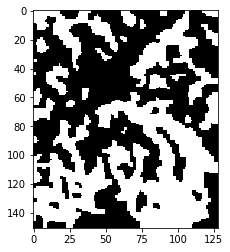

In [20]:
from sklearn.cluster import KMeans

def logPrior(x, neighbors):
    return x * np.sum(neighbors) 

def logLikelihood(y, hist, histBins):
    
    def getClosestDistanceIndex(vector, vectors):
        def getEucDistance(list1, list2):
            sum = 0
            for idx, i in enumerate(list1):
                sum = sum + (i - list2[idx])**2
            return np.sqrt(sum)
                
        minIndex = 0
        min = getEucDistance(vector, vectors[0])
        for index, v in enumerate(vectors):
            if getEucDistance(vector, v) < min:
                min = getEucDistance(vector, v)
                minIndex = index
        return minIndex
    
    return hist[getClosestDistanceIndex(y, histBins)]

def energy(x, pixel, neighbors, beta, hist, histBins, ita):
    return np.exp(beta * logPrior(x, neighbors) + ita * logLikelihood(pixel, hist, histBins))

def getMask(colour: list, img):
    mask = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            col = img[i, j]
            if (col[0] == colour[0] and col[1] == colour[1] and colour[2] == colour[2]):
                mask.append((i,j))
    return mask

def kmeans(Data, NClusters):
    km = KMeans(NClusters)
    fitted = km.fit(Data)
    return ([arr.tolist() for arr in fitted.cluster_centers_], list(fitted.labels_))

def getInitialHistogram(img, mask, bins, maskPixelsToBinsMap):
    size = len(bins)
    hist = np.zeros(size)

    for index, pixel in enumerate(mask):
        bin = maskPixelsToBinsMap[index]
        hist[bin] = hist[bin] + 1
    
    #normalise here:
    hist = hist / sum(hist)
    
    return hist

green = [72, 255, 0]
red = [255, 0, 0]

fgMaskCoords = getMask(green, im4masked)
bgMaskCoords = getMask(red, im4masked)

fgMask = list(map(lambda coord: list(im4[coord]), fgMaskCoords))
bgMask = list(map(lambda coord: list(im4[coord]), bgMaskCoords))

bothMasks = []
for m in fgMask:
    bothMasks.append(m)

for m in bgMask:
    bothMasks.append(m)

bins, binsMap = kmeans(bothMasks, 20)

fgBinsMap = []
bgBinsMap = []
for index, entry in enumerate(binsMap):
    if index < len(fgMask):
        fgBinsMap.append(entry)
    else: 
        bgBinsMap.append(entry)

fgHist = getInitialHistogram(im4, fgMask, bins, fgBinsMap)
bgHist = getInitialHistogram(im4, bgMask, bins, bgBinsMap)

'''
# Maximum likelihood
x = np.zeros(im4.shape)
for i in range(im4.shape[0]):
    for j in range(im4.shape[1]):
        pixel = im4[i, j]
        if (logLikelihood(pixel, fgHist, fgBins) > logLikelihood(pixel, bgHist, bgBins)):
            x[i, j] = 1
        else:
            x[i,j] = -1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(x)
'''
#gibbs
x = np.zeros(im4.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z = np.random.rand()
        if z < 0.5:
            x[i,j] = -1
        else:
            x[i,j] = 1

T = 7

M = im4.shape[0]
N = im4.shape[1]

for t in range(T):

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            neighbors = neighborvalues(i, j, M, N, x)
            y = im4[i,j]
            energyFg = energy(1, y, neighbors, 1, fgHist, bins, 2)
            energyBg = energy(-1, y, neighbors, 1, bgHist, bins, 2)
            post = energyFg/(energyFg + energyBg)
            z = np.random.rand()
            if z < post:
                x[i,j] = 1
            else:
                x[i,j] = -1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(x)
